#### Imports

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import json
from tqdm import tqdm
import spotipy.util as util
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [3]:
client_id = '97871d93601747c3befb7e655f1e608b'
client_secret = '42461d8ae6404474be667436298a8537'

#### API Start

In [4]:

credentials = SpotifyClientCredentials(
        client_id=client_id,
        client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)


In [5]:
# token = credentials.get_access_token()
# print(token)
# spotify = spotipy.Spotify(auth=token)
genre_choice= ['EDM', 'Hip-Hop/Rap', 'K-Pop', 'Latin', 'Metal', 'Pop', 'R&B', 'Reggae', 'Rock', 'Blues', 'Classical', 'Country']

#### API CALLS 

In [6]:
def get_genre(genre_list ):

    all_genre = {}
    for genre in tqdm(genre_list):
        song_id = []
        offset = 0
        res = sp.search(q = genre, offset=offset,type='track', limit=50)
        while res:
            idx = 0
            try:
                while idx < len(res['tracks']['items']):
                    song_id.append(res['tracks']['items'][idx]['id'])
                   
                    idx +=1
                offset += 50
                res = sp.search(q = genre, offset=offset,type='track', limit=50)
            except:
                break
        all_genre[genre] = song_id
    return all_genre

In [7]:
def get_name(genre_list):
    all_name= {}
    for genre in tqdm(genre_list):
        items = []
        offset = 0
        res = sp.search(q = genre, offset=offset,type='track', limit=50)
        while res:
            idx = 0
            try:
                while idx < len(res['tracks']['items']):
                    items.append(res['tracks']['items'][idx]['name'])
                    idx +=1
                offset += 50
                res = sp.search(q = genre, offset=offset,type='track', limit=50)
            except:
                break
        all_name[genre] = items
    return all_name


In [130]:
def get_popular(genre_list):
    all_popular= {}
    for genre in tqdm(genre_list):
        popular = []
        offset = 0
        res = sp.search(q = genre, offset=offset,type='track', limit=50)
        while res:
            idx = 0
            try:
                while idx < len(res['tracks']['items']):
                    popular.append(res['tracks']['items'][idx]['popularity'])
                    idx +=1
                offset += 50
                res = sp.search(q = genre, offset=offset,type='track', limit=50)
            except:
                break
        all_popular[genre] = popular
    return all_popular


In [121]:
test1 = sp.search(q = genre, offset=50,type='track', limit=50)

In [132]:
pop_1 = get_popular(genre_choice)


100%|██████████| 12/12 [01:57<00:00,  9.80s/it]


In [133]:
b

In [8]:
song_list = get_genre(genre_choice)

100%|██████████| 12/12 [01:53<00:00,  9.48s/it]


In [ ]:
genre_choice

In [9]:
name_list = get_name(genre_choice)

100%|██████████| 12/12 [01:55<00:00,  9.61s/it]


#### Data Cleaning

In [10]:
## make the respone from the API CALL into a dataframe 
result_1 = []
for genre,list_of_name in name_list.items():
    for i in list_of_name:
        result_1.append([genre,i])
        
name_df = pd.DataFrame(result_1, columns= ["genre","name"])

In [15]:
song_name = name_df.name 

In [136]:
song_pop = pop_df.popularity

In [17]:
genre_df['name'] = song_name

In [186]:
genre_df['popularity'] = song_pop

NameError: name 'song_pop' is not defined

In [12]:
## make the respone from the API CALL into a dataframe 
result = []            
for genre,list_of_id in song_list.items():
    for i in list_of_id:
        result.append([genre,i])
        
genre_df = pd.DataFrame(result, columns= ["genre","id"])

In [138]:
genre_df # Data frame with all the needed features 

genre                      id                  name  popularity
0          EDM  3MckdkpumOZiX2efM3B266          EDM O' CLOCK          48
1          EDM  5wlscxWc7OyrsE22xToo1N            EDM Bubble          56
2          EDM  16Fz1NtxjEaWdZZkZU8nJ3                Edmore          37
3          EDM  2jVx2ayLTAaRGz7pwY7j9I             EDM Sucks          45
4          EDM  6iBzUjscIAeQ2vKV67UuZM     EDM Death Machine          42
...        ...                     ...                   ...         ...
23995  Country  7f8EklpoN6clFk1IOSLGHt  Going up the Country          22
23996  Country  12Dtv2yJsXqSv7buGB5atX          Man Of Steel          26
23997  Country  06s2xqfSDROCIhzxH5Hsu6      Top Of The World          26
23998  Country  3JMyRsMQIeRXSWwFbO5gLn        Kiss You There          24
23999  Country  6fUsMz9gWOxM87zYoqNBwY        Nature Of Bank          32

[23399 rows x 4 columns]

In [19]:
## make the song_ids into a numpy list so that we can make another API call for the song features.
final_ids = np.ravel(list(song_list.values()))  

In [94]:
## get the song features for all the song_ids in the final_ids list 
song_feature_test = [] 
for i in tqdm(range(0,len(final_ids),50)):
    song_feature_test.append(sp.audio_features(final_ids[i:i+50]))


 57%|█████▊    | 276/480 [00:27<00:17, 11.89it/s]

retrying after...1secs



100%|██████████| 480/480 [00:48<00:00,  9.82it/s]


In [101]:
song_feature_test[479]

[{'danceability': 0.592,
  'energy': 0.174,
  'key': 2,
  'loudness': -17.798,
  'mode': 1,
  'speechiness': 0.116,
  'acousticness': 0.82,
  'instrumentalness': 0.764,
  'liveness': 0.105,
  'valence': 0.302,
  'tempo': 100.135,
  'type': 'audio_features',
  'id': '40E1bLxYlX4t9VqQoo81OC',
  'uri': 'spotify:track:40E1bLxYlX4t9VqQoo81OC',
  'track_href': 'https://api.spotify.com/v1/tracks/40E1bLxYlX4t9VqQoo81OC',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/40E1bLxYlX4t9VqQoo81OC',
  'duration_ms': 161893,
  'time_signature': 4},
 {'danceability': 0.326,
  'energy': 0.563,
  'key': 2,
  'loudness': -12.352,
  'mode': 0,
  'speechiness': 0.0328,
  'acousticness': 0.0403,
  'instrumentalness': 0.00098,
  'liveness': 0.26,
  'valence': 0.534,
  'tempo': 192.345,
  'type': 'audio_features',
  'id': '0H0g1bov9Zf2Ebqgod7R9R',
  'uri': 'spotify:track:0H0g1bov9Zf2Ebqgod7R9R',
  'track_href': 'https://api.spotify.com/v1/tracks/0H0g1bov9Zf2Ebqgod7R9R',
  'analysis_url': 'https://

In [107]:
## loop through the respone and append the needed features while checking for NoNtypes
items_1 = []
# c = 0 
# try:
for i in song_feature_test:
    for j in i:
        
        if j != dict:
            items_1.append(j)
        else:
            items_1.append([j['danceability'],j['energy'],j['key'],j['loudness'],\
                    j['mode'],j['speechiness'],j['acousticness'],j['instrumentalness'],\
                    j['liveness'],j['valence'],j['tempo'],j['type'],j['id'],j['uri'],\
                    j['track_href'],j['analysis_url'],j['duration_ms'],j['time_signature']])

 

    

In [108]:
## get rid of the NonTypes
items_1 =[x for x in items_1 if x is not None]

In [109]:
## make a dataframe with the features of the song_ids
final_df1 = pd.DataFrame(items_1, columns= list(song_feature_test[0][0].keys()))

In [112]:
## check for any duplicates 
final_df1= final_df1.drop_duplicates(subset = 'id')

In [113]:
len(final_df1)

22727

In [139]:
## check for any duplicates in the genre dataframe
genre_df.id.duplicated().any()

False

In [115]:
genre_df= genre_df.drop_duplicates(subset = 'id')

In [140]:
len(genre_df)

23399

In [253]:
## get the final data frame with all the needed features
merged_df = pd.merge(final_df1,genre_df, on= 'id')

In [254]:
merged_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.805   0.895    1    -3.527     1       0.1090      0.001590   
1             0.630   0.839    6    -3.971     0       0.0422      0.031300   
2             0.607   0.631    6    -7.753     0       0.1710      0.410000   
3             0.501   0.788   10    -3.655     0       0.1340      0.019600   
4             0.661   0.950    9    -3.417     1       0.1310      0.000802   
...             ...     ...  ...       ...   ...          ...           ...   
22722         0.433   0.898    2    -6.846     1       0.0812      0.073100   
22723         0.469   0.648    0    -6.020     1       0.0311      0.090100   
22724         0.676   0.791    8    -5.640     1       0.0383      0.290000   
22725         0.545   0.723    9    -5.189     0       0.0284      0.063300   
22726         0.442   0.560    0   -11.126     0       0.0432      0.000037   

       instrumentalness  liveness  valence  ...            type  \
0              0.124000    0.4400    0.196  ...  audio_features   
1              0.537000    0.1220    0.624  ...  audio_features   
2              0.000000    0.1000    0.335  ...  audio_features   
3              0.001140    0.0983    0.377  ...  audio_features   
4              0.452000    0.1160    0.301  ...  audio_features   
...                 ...       ...      ...  ...             ...   
22722          0.000000    0.3730    0.456  ...  audio_features   
22723          0.000073    0.2040    0.761  ...  audio_features   
22724          0.000000    0.4870    0.944  ...  audio_features   
22725          0.000000    0.3300    0.551  ...  audio_features   
22726          0.822000    0.1130    0.386  ...  audio_features   

                           id                                   uri  \
0      3MckdkpumOZiX2efM3B266  spotify:track:3MckdkpumOZiX2efM3B266   
1      5wlscxWc7OyrsE22xToo1N  spotify:track:5wlscxWc7OyrsE22xToo1N   
2      16Fz1NtxjEaWdZZkZU8nJ3  spotify:track:16Fz1NtxjEaWdZZkZU8nJ3   
3      2jVx2ayLTAaRGz7pwY7j9I  spotify:track:2jVx2ayLTAaRGz7pwY7j9I   
4      6iBzUjscIAeQ2vKV67UuZM  spotify:track:6iBzUjscIAeQ2vKV67UuZM   
...                       ...                                   ...   
22722  7f8EklpoN6clFk1IOSLGHt  spotify:track:7f8EklpoN6clFk1IOSLGHt   
22723  12Dtv2yJsXqSv7buGB5atX  spotify:track:12Dtv2yJsXqSv7buGB5atX   
22724  06s2xqfSDROCIhzxH5Hsu6  spotify:track:06s2xqfSDROCIhzxH5Hsu6   
22725  3JMyRsMQIeRXSWwFbO5gLn  spotify:track:3JMyRsMQIeRXSWwFbO5gLn   
22726  6fUsMz9gWOxM87zYoqNBwY  spotify:track:6fUsMz9gWOxM87zYoqNBwY   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/3MckdkpumOZi...   
1      https://api.spotify.com/v1/tracks/5wlscxWc7Oyr...   
2      https://api.spotify.com/v1/tracks/16Fz1NtxjEaW...   
3      https://api.spotify.com/v1/tracks/2jVx2ayLTAaR...   
4      https://api.spotify.com/v1/tracks/6iBzUjscIAeQ...   
...                                                  ...   
22722  https://api.spotify.com/v1/tracks/7f8EklpoN6cl...   
22723  https://api.spotify.com/v1/tracks/12Dtv2yJsXqS...   
22724  https://api.spotify.com/v1/tracks/06s2xqfSDROC...   
22725  https://api.spotify.com/v1/tracks/3JMyRsMQIeRX...   
22726  https://api.spotify.com/v1/tracks/6fUsMz9gWOxM...   

                                            analysis_url duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/3Mck...      148571   
1      https://api.spotify.com/v1/audio-analysis/5wls...      142503   
2      https://api.spotify.com/v1/audio-analysis/16Fz...      186000   
3      https://api.spotify.com/v1/audio-analysis/2jVx...      189600   
4      https://api.spotify.com/v1/audio-analysis/6iBz...      263088   
...                                                  ...         ...   
22722  https://api.spotify.com/v1/audio-analysis/7f8E...      190453   
22723  https://api.spotify.com/v1/audio-analysis/12Dt...      274333   
22724  https://api.spotify.com/

In [143]:
## save the file into a csv in the same directory for back up.
merged_df.to_csv('working_df.csv')

#### EDA

In [145]:
merged_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'name', 'popularity'],
      dtype='object')

##### Outliers

In [146]:

#SHOWS ALL OUTLIERS FOR EACH FEATURE
def outliers(df):
    for i in df.columns:
        print(i)
        sns.boxplot(df[i])
        plt.show()

In [241]:
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14d4844e0>,
      dtype=object)

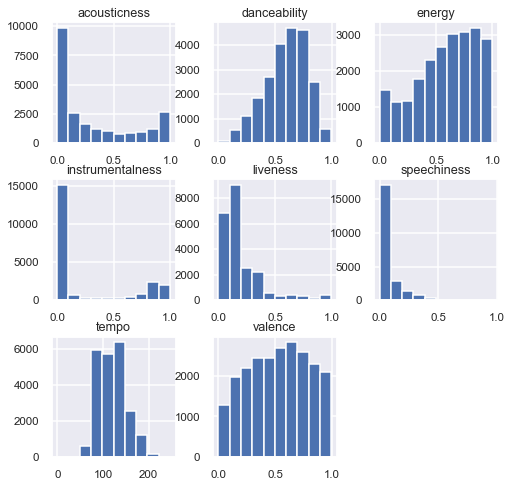

In [243]:

X_prenorm = merged_df[audio_cols]
pd.DataFrame(X_prenorm,columns=audio_cols).hist(figsize=(8,8))

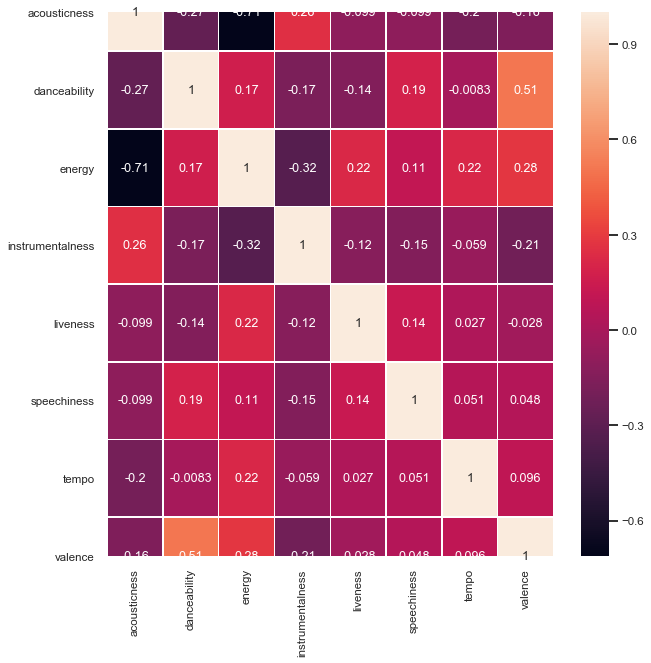

In [244]:
plt.figure(figsize=(10,10))
corr = X_prenorm.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)

danceability


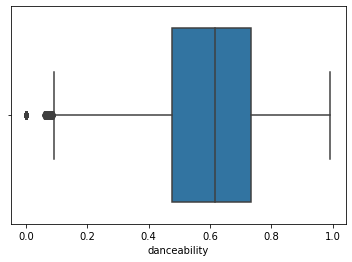

energy


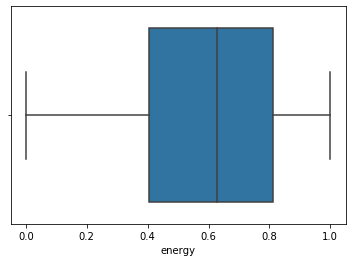

key


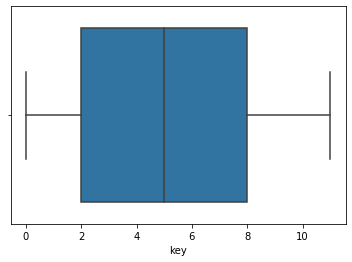

loudness


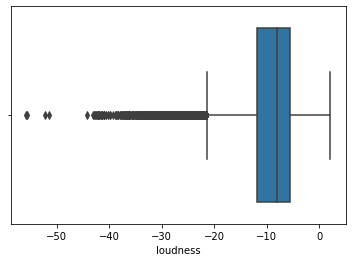

mode


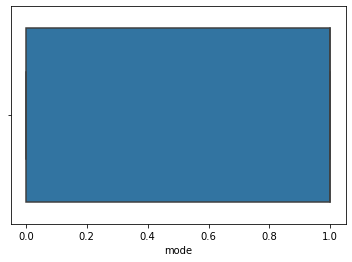

speechiness


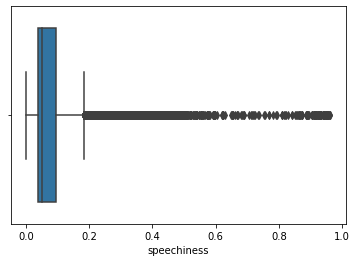

acousticness


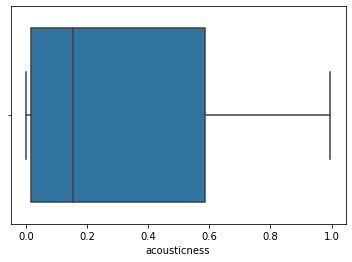

instrumentalness


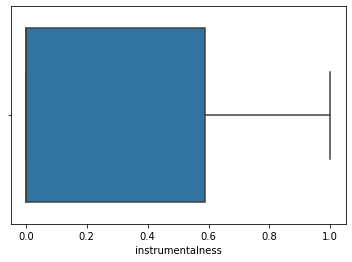

liveness


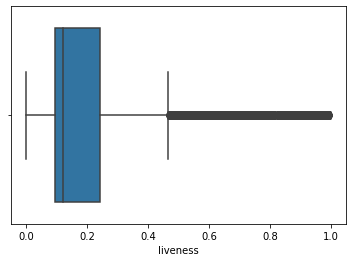

valence


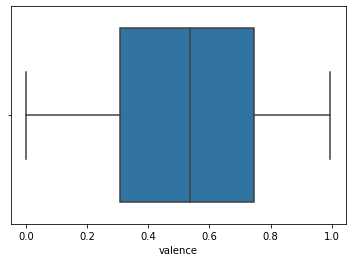

tempo


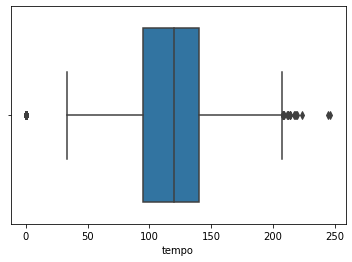

duration_ms


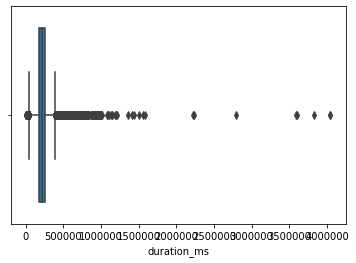

time_signature


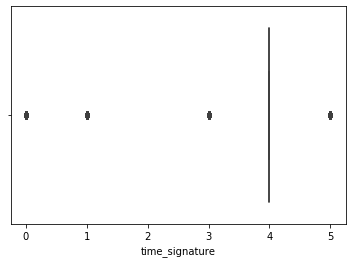

popularity


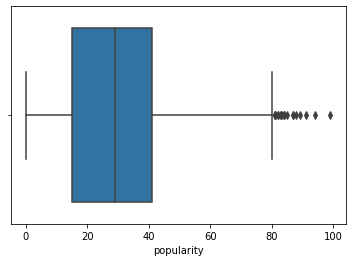

In [158]:
outliers(contin_df)

In [156]:
## get all the continous variables from the dataframe.
contin_df = merged_df.drop(['id','type','uri','track_href','analysis_url','name','genre'], axis = 1)

In [157]:
contin_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.805   0.895    1    -3.527     1       0.1090      0.001590   
1             0.630   0.839    6    -3.971     0       0.0422      0.031300   
2             0.607   0.631    6    -7.753     0       0.1710      0.410000   
3             0.501   0.788   10    -3.655     0       0.1340      0.019600   
4             0.661   0.950    9    -3.417     1       0.1310      0.000802   
...             ...     ...  ...       ...   ...          ...           ...   
22722         0.433   0.898    2    -6.846     1       0.0812      0.073100   
22723         0.469   0.648    0    -6.020     1       0.0311      0.090100   
22724         0.676   0.791    8    -5.640     1       0.0383      0.290000   
22725         0.545   0.723    9    -5.189     0       0.0284      0.063300   
22726         0.442   0.560    0   -11.126     0       0.0432      0.000037   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.124000    0.4400    0.196  126.042       148571   
1              0.537000    0.1220    0.624  127.980       142503   
2              0.000000    0.1000    0.335  159.988       186000   
3              0.001140    0.0983    0.377  150.137       189600   
4              0.452000    0.1160    0.301  128.030       263088   
...                 ...       ...      ...      ...          ...   
22722          0.000000    0.3730    0.456   88.951       190453   
22723          0.000073    0.2040    0.761  163.626       274333   
22724          0.000000    0.4870    0.944  141.214       233973   
22725          0.000000    0.3300    0.551   81.017       228965   
22726          0.822000    0.1130    0.386  180.009        84454   

       time_signature  popularity  
0                   4          48  
1                   4          56  
2                   4          37  
3                   4          45  
4                   4          42  
...               ...         ...  
22722               4          22  
22723               4          26  
22724               4          26  
22725               4          24  
22726               4          32  

[22727 rows x 14 columns]

##### Distribution

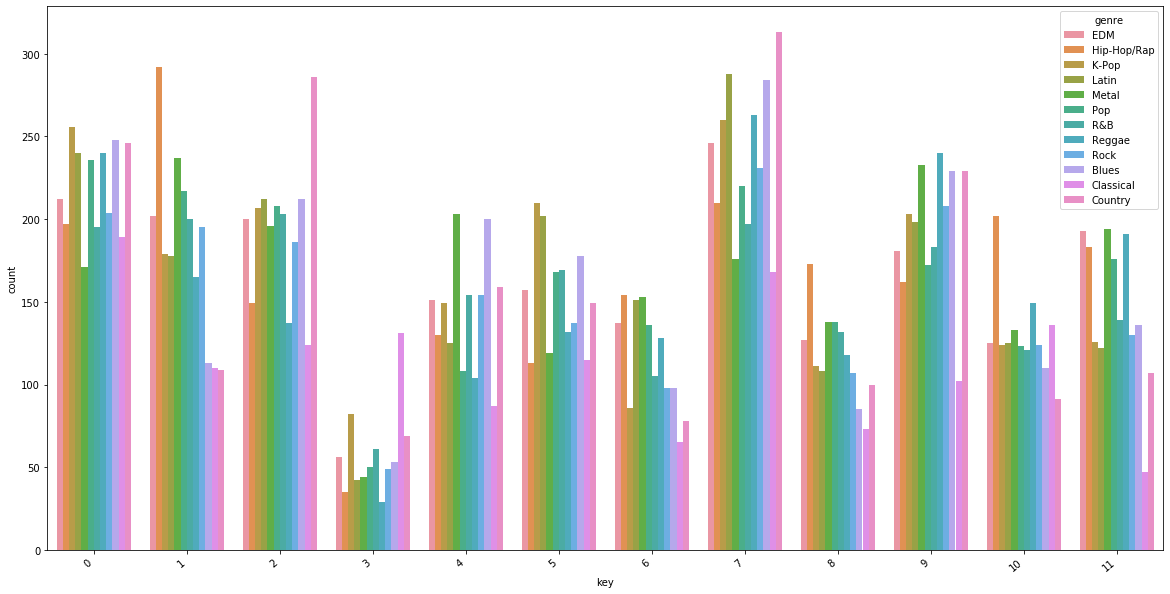

In [179]:

plt.figure(figsize=(20,10))
ax = sns.countplot(merged_df['key'], hue=merged_df['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

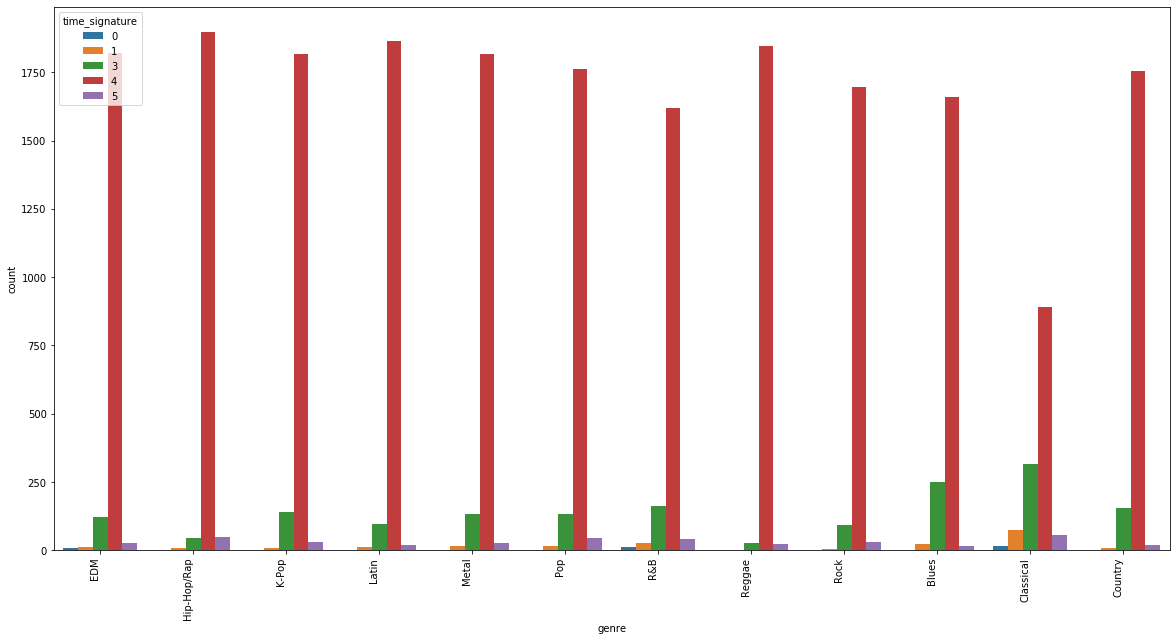

In [185]:

plt.figure(figsize=(20,10))
ax = sns.countplot(merged_df['genre'], hue=merged_df['time_signature'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

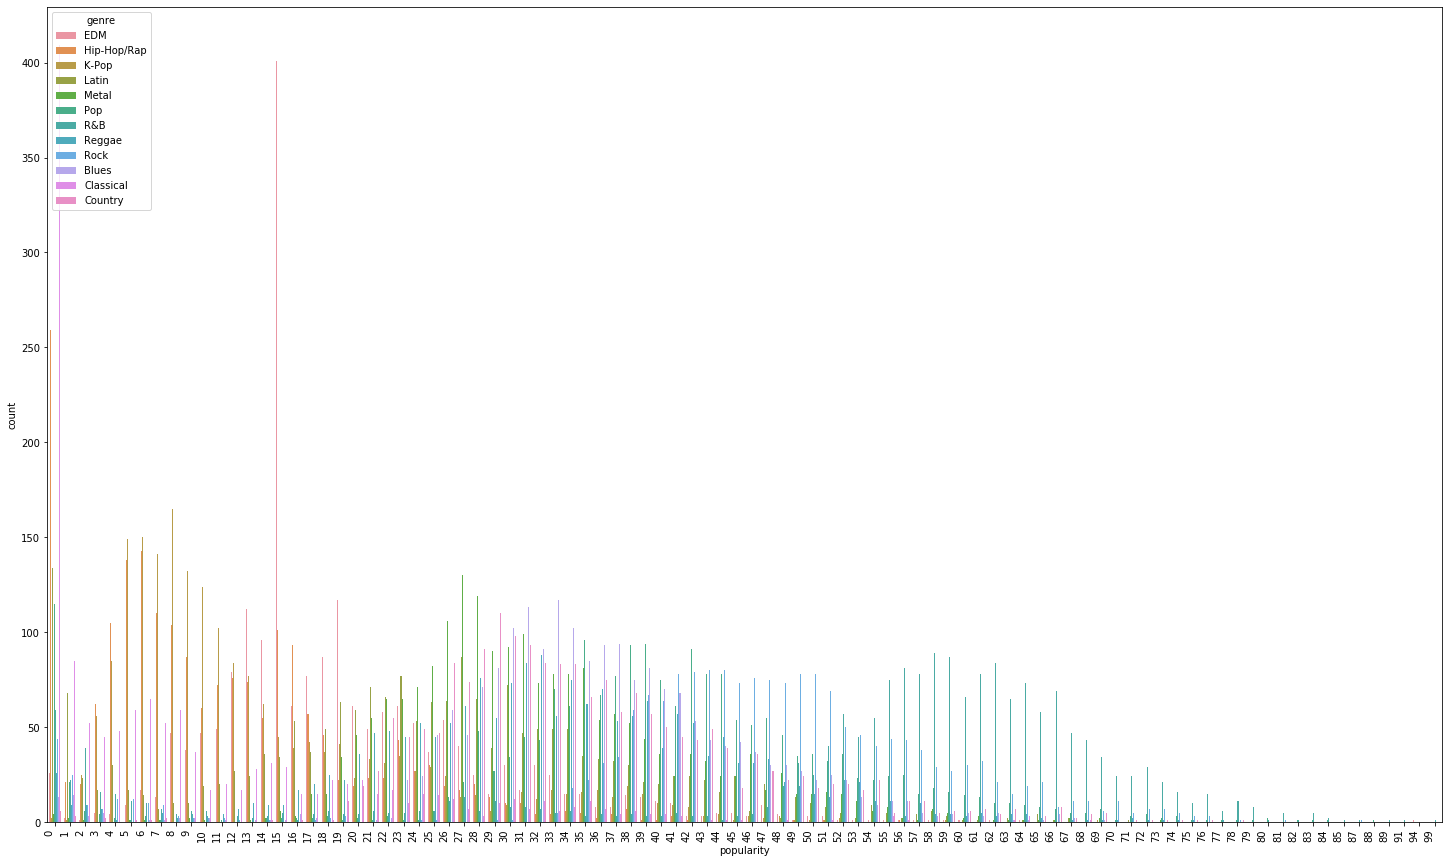

In [191]:

plt.figure(figsize=(25,15))
ax = sns.countplot(merged_df['popularity'], hue=merged_df['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

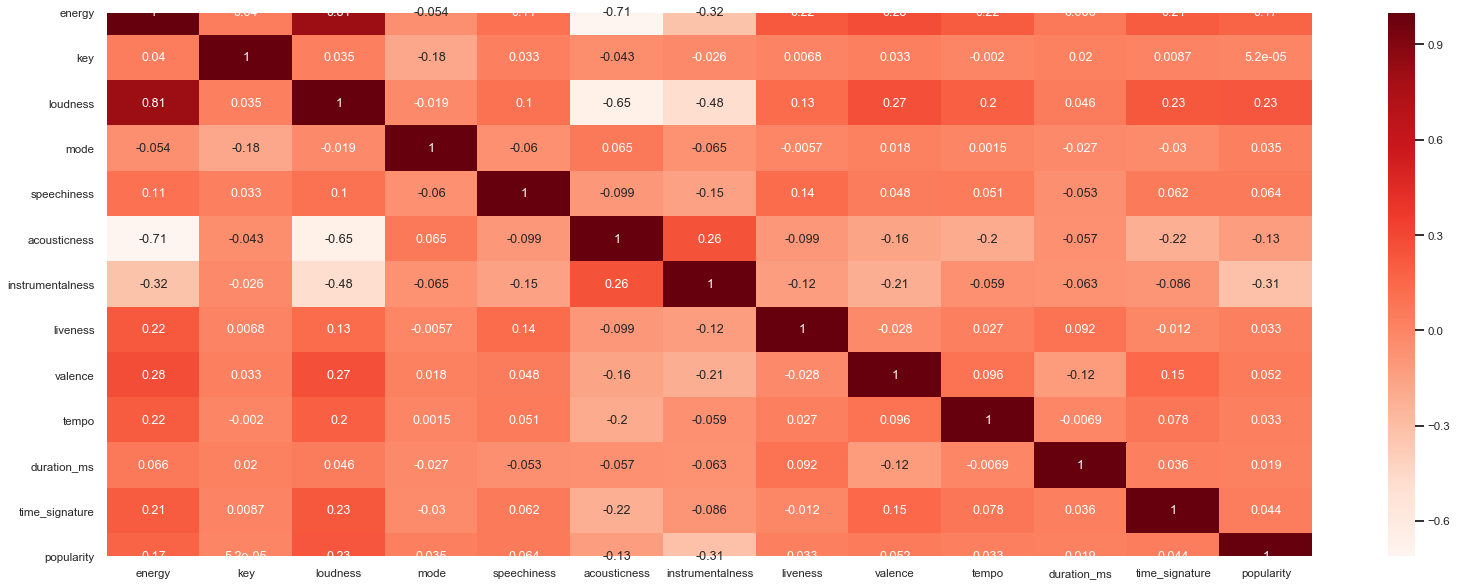

In [206]:
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(merged_df.iloc[:,1:].corr(), cmap='Reds', annot=True);

In [163]:
merged_df['key'].value_counts()

7     2856
0     2634
9     2340
2     2320
1     2197
5     1849
11    1744
4     1724
10    1563
8     1410
6     1389
3      701
Name: key, dtype: int64

In [164]:
merged_df['mode'].value_counts()

1    14874
0     7853
Name: mode, dtype: int64

In [165]:
merged_df['time_signature'].value_counts()

4    20441
3     1665
5      374
1      209
0       38
Name: time_signature, dtype: int64

Text(0.5, 1.0, 'Distribution of Tempo')

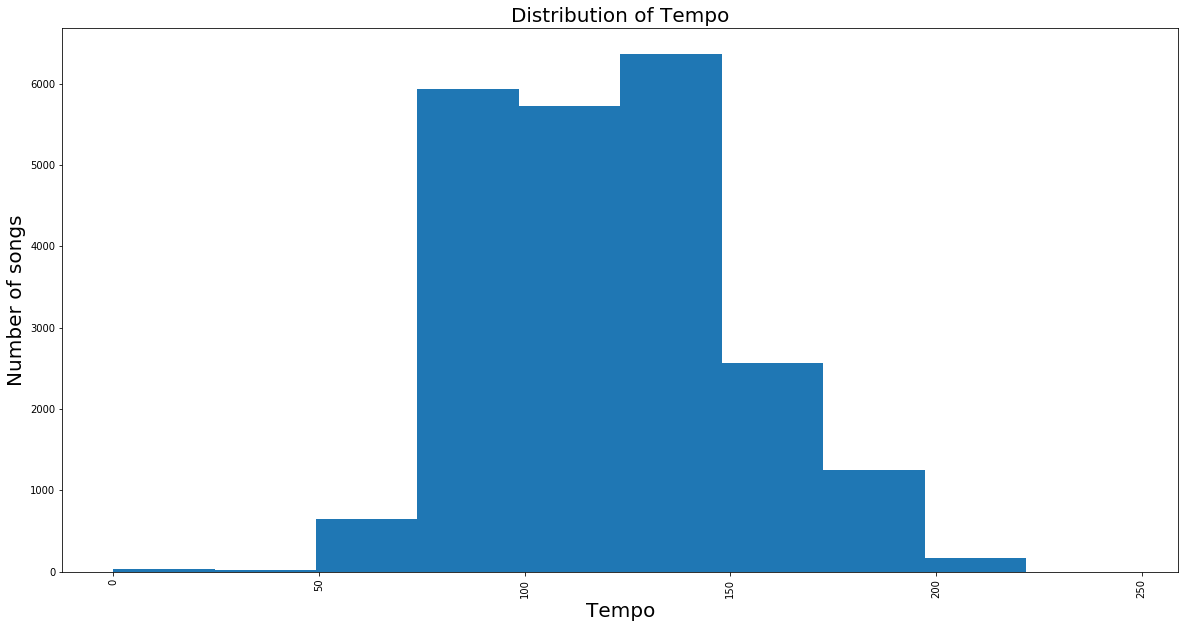

In [172]:

plt.figure(figsize=(20,10))
plt.hist(merged_df['tempo'])
plt.xticks(rotation=90)
plt.xlabel('Tempo', fontsize = 20)
plt.ylabel('Items', fontsize = 20)
plt.title('Distribution of Tempo', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Energy')

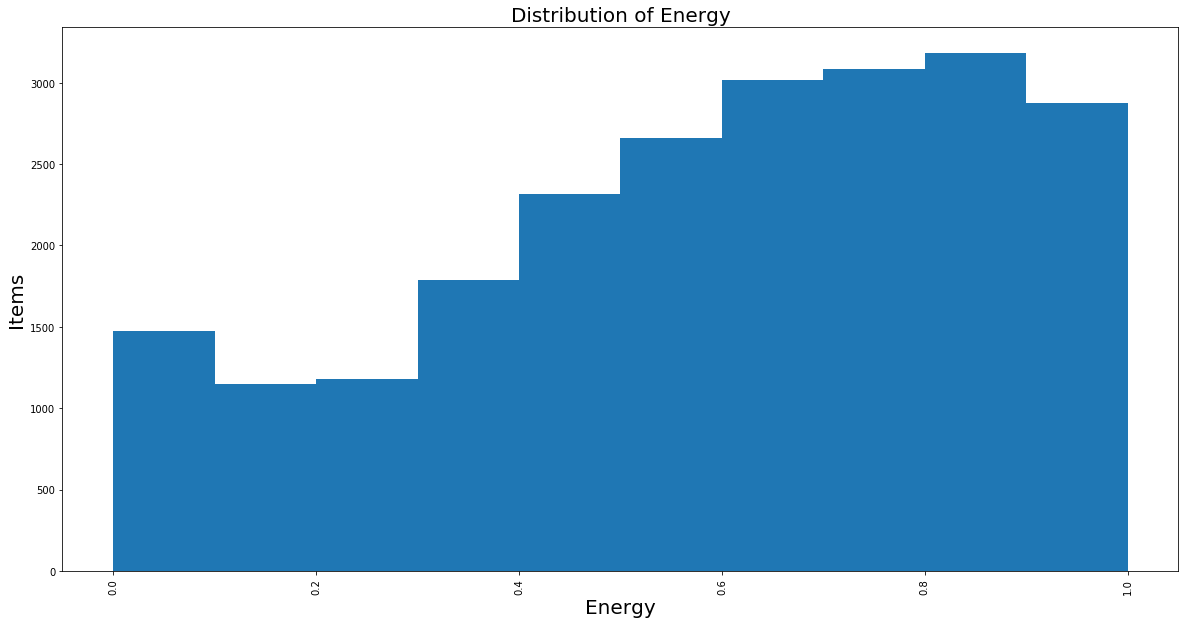

In [174]:

plt.figure(figsize=(20,10))
plt.hist(merged_df['energy'])
plt.xticks(rotation=90)
plt.xlabel('Energy', fontsize = 20)
plt.ylabel('Items', fontsize = 20)
plt.title('Distribution of Energy', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Energy')

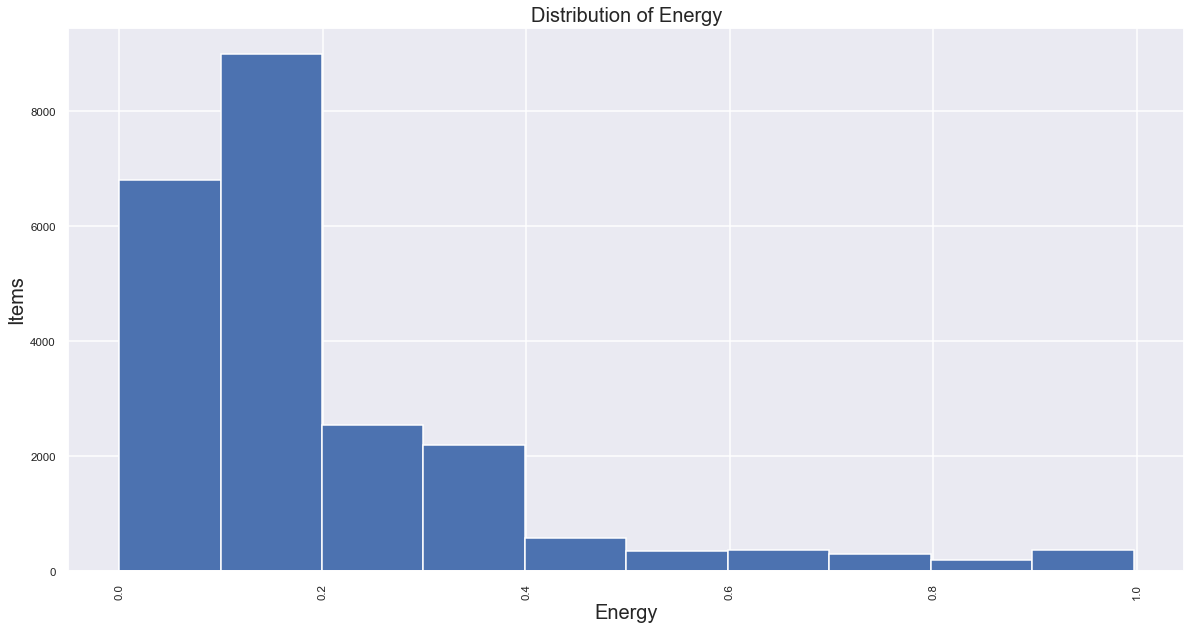

In [203]:

plt.figure(figsize=(20,10))
plt.hist(merged_df['liveness'])
plt.xticks(rotation=90)
plt.xlabel('Energy', fontsize = 20)
plt.ylabel('Items', fontsize = 20)
plt.title('Distribution of Energy', fontsize = 20)

In [212]:
merged_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.805   0.895    1    -3.527     1       0.1090      0.001590   
1             0.630   0.839    6    -3.971     0       0.0422      0.031300   
2             0.607   0.631    6    -7.753     0       0.1710      0.410000   
3             0.501   0.788   10    -3.655     0       0.1340      0.019600   
4             0.661   0.950    9    -3.417     1       0.1310      0.000802   
...             ...     ...  ...       ...   ...          ...           ...   
22722         0.433   0.898    2    -6.846     1       0.0812      0.073100   
22723         0.469   0.648    0    -6.020     1       0.0311      0.090100   
22724         0.676   0.791    8    -5.640     1       0.0383      0.290000   
22725         0.545   0.723    9    -5.189     0       0.0284      0.063300   
22726         0.442   0.560    0   -11.126     0       0.0432      0.000037   

       instrumentalness  liveness  valence  ...            type  \
0              0.124000    0.4400    0.196  ...  audio_features   
1              0.537000    0.1220    0.624  ...  audio_features   
2              0.000000    0.1000    0.335  ...  audio_features   
3              0.001140    0.0983    0.377  ...  audio_features   
4              0.452000    0.1160    0.301  ...  audio_features   
...                 ...       ...      ...  ...             ...   
22722          0.000000    0.3730    0.456  ...  audio_features   
22723          0.000073    0.2040    0.761  ...  audio_features   
22724          0.000000    0.4870    0.944  ...  audio_features   
22725          0.000000    0.3300    0.551  ...  audio_features   
22726          0.822000    0.1130    0.386  ...  audio_features   

                           id                                   uri  \
0      3MckdkpumOZiX2efM3B266  spotify:track:3MckdkpumOZiX2efM3B266   
1      5wlscxWc7OyrsE22xToo1N  spotify:track:5wlscxWc7OyrsE22xToo1N   
2      16Fz1NtxjEaWdZZkZU8nJ3  spotify:track:16Fz1NtxjEaWdZZkZU8nJ3   
3      2jVx2ayLTAaRGz7pwY7j9I  spotify:track:2jVx2ayLTAaRGz7pwY7j9I   
4      6iBzUjscIAeQ2vKV67UuZM  spotify:track:6iBzUjscIAeQ2vKV67UuZM   
...                       ...                                   ...   
22722  7f8EklpoN6clFk1IOSLGHt  spotify:track:7f8EklpoN6clFk1IOSLGHt   
22723  12Dtv2yJsXqSv7buGB5atX  spotify:track:12Dtv2yJsXqSv7buGB5atX   
22724  06s2xqfSDROCIhzxH5Hsu6  spotify:track:06s2xqfSDROCIhzxH5Hsu6   
22725  3JMyRsMQIeRXSWwFbO5gLn  spotify:track:3JMyRsMQIeRXSWwFbO5gLn   
22726  6fUsMz9gWOxM87zYoqNBwY  spotify:track:6fUsMz9gWOxM87zYoqNBwY   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/3MckdkpumOZi...   
1      https://api.spotify.com/v1/tracks/5wlscxWc7Oyr...   
2      https://api.spotify.com/v1/tracks/16Fz1NtxjEaW...   
3      https://api.spotify.com/v1/tracks/2jVx2ayLTAaR...   
4      https://api.spotify.com/v1/tracks/6iBzUjscIAeQ...   
...                                                  ...   
22722  https://api.spotify.com/v1/tracks/7f8EklpoN6cl...   
22723  https://api.spotify.com/v1/tracks/12Dtv2yJsXqS...   
22724  https://api.spotify.com/v1/tracks/06s2xqfSDROC...   
22725  https://api.spotify.com/v1/tracks/3JMyRsMQIeRX...   
22726  https://api.spotify.com/v1/tracks/6fUsMz9gWOxM...   

                                            analysis_url duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/3Mck...      148571   
1      https://api.spotify.com/v1/audio-analysis/5wls...      142503   
2      https://api.spotify.com/v1/audio-analysis/16Fz...      186000   
3      https://api.spotify.com/v1/audio-analysis/2jVx...      189600   
4      https://api.spotify.com/v1/audio-analysis/6iBz...      263088   
...                                                  ...         ...   
22722  https://api.spotify.com/v1/audio-analysis/7f8E...      190453   
22723  https://api.spotify.com/v1/audio-analysis/12Dt...      274333   
22724  https://api.spotify.com/

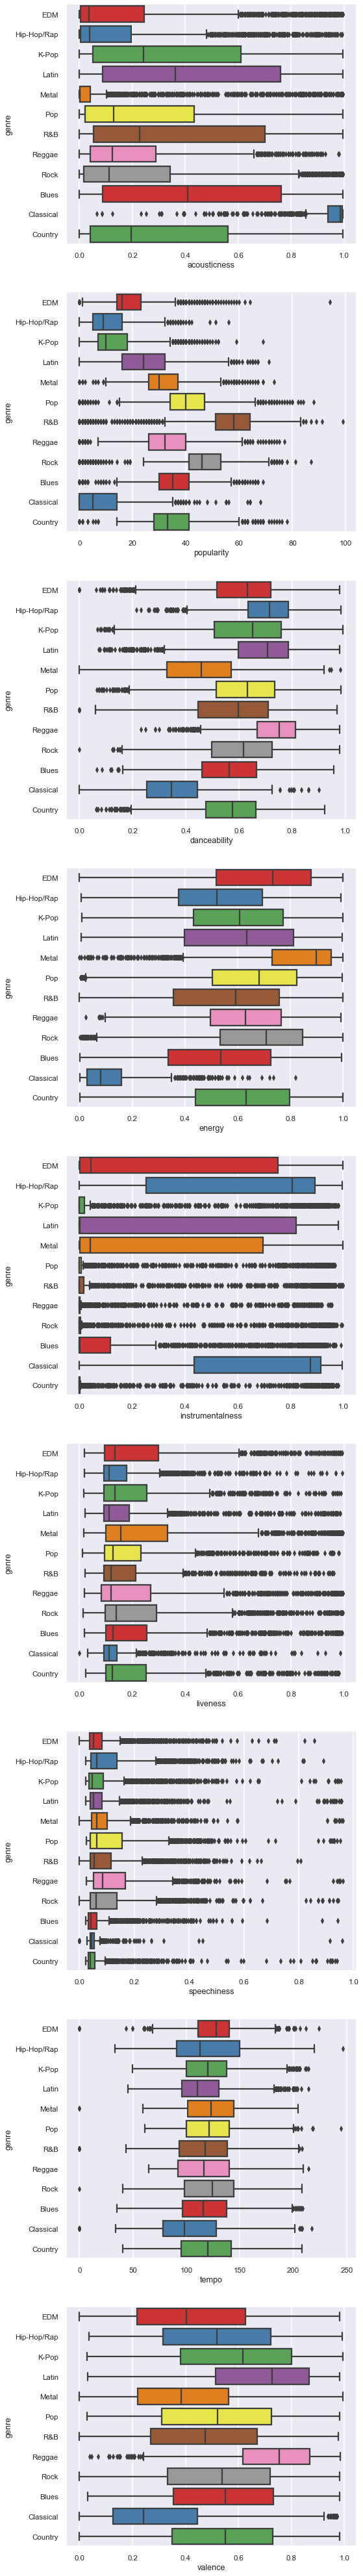

In [202]:

audio_cols = ['acousticness','popularity','danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
n_features = len(audio_cols)

fig, axes = plt.subplots(n_features, 1, figsize=(8,8*n_features))

for i in range(n_features):
    ax = axes[i]
    feature = audio_cols[i]
    sns.boxplot(x=feature, y='genre', data=merged_df, ax=ax, palette='Set1')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


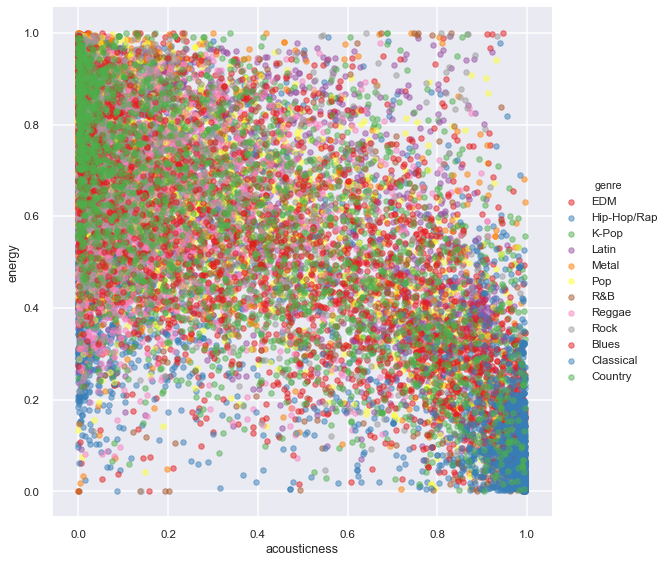

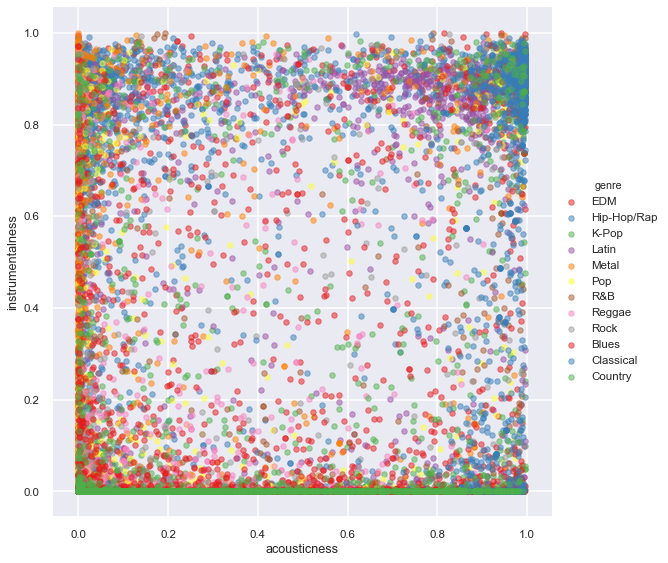

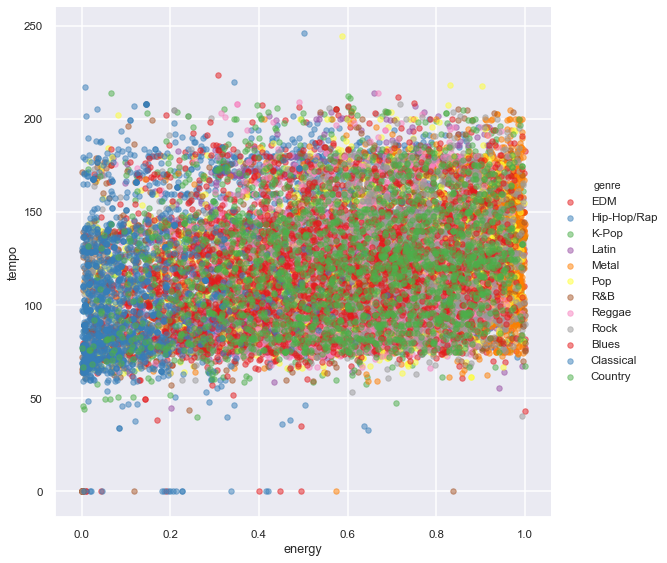

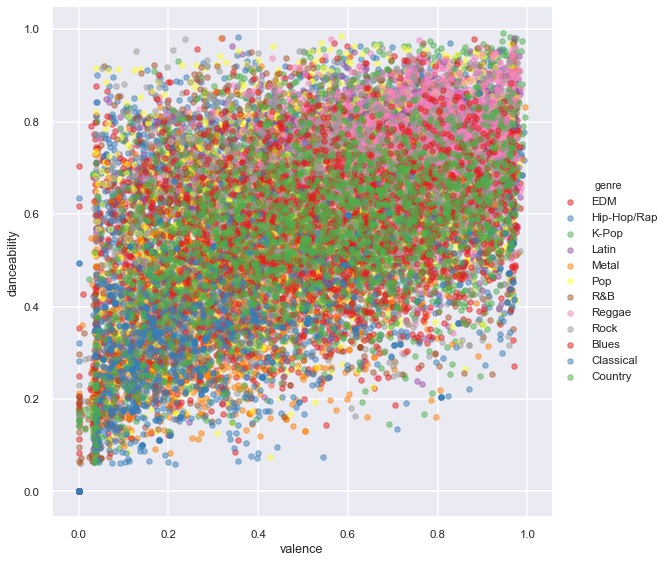

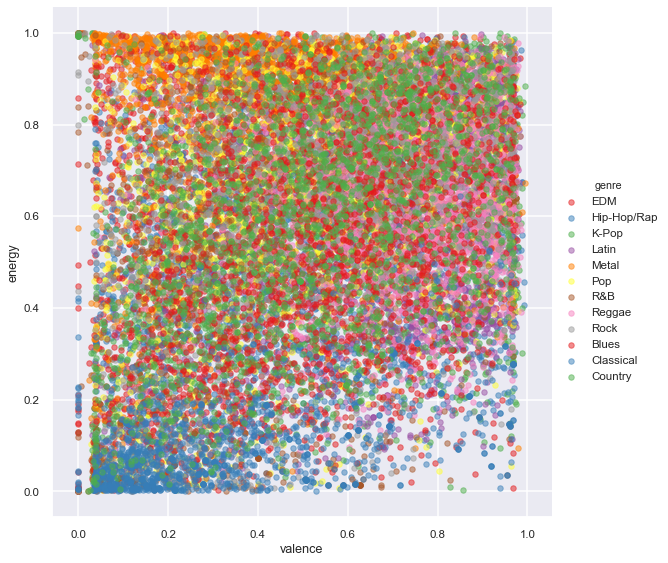

In [207]:
import itertools

### For all audio combos
# audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
# audio_cols.remove('liveness')
# audio_combos = list(itertools.combinations(audio_cols, 2))

### Select few audio combos
audio_combos = [('acousticness', 'energy'), 
                ('acousticness', 'instrumentalness'), 
                ('energy', 'tempo'), 
                ('valence', 'danceability'),
              ('valence', 'energy'),
               ]

#audio_genre_combos = list(itertools.combinations(audio))
# df_sample.sort_values('genres_top', inplace=True)
for x, y in audio_combos:
    sns.lmplot(data=merged_df, x=x, y=y, hue="genre", palette='Set1',
           fit_reg=False, legend=True, size=8, scatter_kws={'alpha':0.5, 's':30})

Text(0.5, 1, 'Popularity vs. Energy')

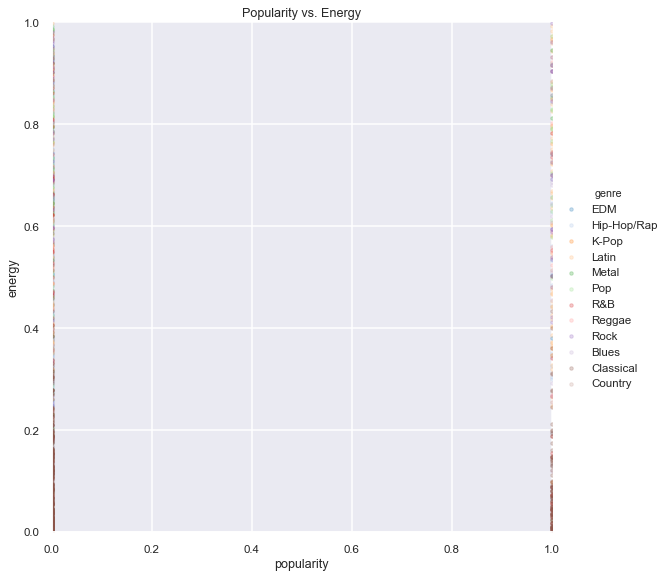

In [211]:

sns.lmplot(data=merged_df, x="popularity", y="energy", hue="genre", palette="tab20",
           fit_reg=False, legend=True, height=8, 
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Popularity vs. Energy")

In [4]:
merged_df = pd.read_csv('working_df.csv')

#### Models

In [250]:
merged_df['popularity'].value_counts()

2    9225
1    6457
3    4800
4    1123
5    1122
Name: popularity, dtype: int64

listy=[]
for i in merged_df['popularity']:
    if i>0 and i<=20:
        i=1
        listy.append(i)
    elif i>20 and i<=40:
        i=2
        listy.append(i)
    elif i>40 and i<=60:
        i=3
        listy.append(i)
    elif i>60 and i<=80:
        i=4
        listy.append(i)
    else:
        i=5
        listy.append(i)

In [247]:
len(listy)

22727

In [248]:
merged_df['popularity'] = listy

In [252]:
merged_df['tempo'].value_counts()

0.000      37
140.019    13
128.024    13
127.992    11
70.993     11
           ..
90.794      1
112.966     1
87.324      1
104.959     1
90.543      1
Name: tempo, Length: 17056, dtype: int64

In [6]:
merged_df

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0               0         0.805   0.895    1    -3.527     1       0.1090   
1               1         0.630   0.839    6    -3.971     0       0.0422   
2               2         0.607   0.631    6    -7.753     0       0.1710   
3               3         0.501   0.788   10    -3.655     0       0.1340   
4               4         0.661   0.950    9    -3.417     1       0.1310   
...           ...           ...     ...  ...       ...   ...          ...   
22722       22722         0.433   0.898    2    -6.846     1       0.0812   
22723       22723         0.469   0.648    0    -6.020     1       0.0311   
22724       22724         0.676   0.791    8    -5.640     1       0.0383   
22725       22725         0.545   0.723    9    -5.189     0       0.0284   
22726       22726         0.442   0.560    0   -11.126     0       0.0432   

       acousticness  instrumentalness  liveness  ...            type  \
0          0.001590          0.124000    0.4400  ...  audio_features   
1          0.031300          0.537000    0.1220  ...  audio_features   
2          0.410000          0.000000    0.1000  ...  audio_features   
3          0.019600          0.001140    0.0983  ...  audio_features   
4          0.000802          0.452000    0.1160  ...  audio_features   
...             ...               ...       ...  ...             ...   
22722      0.073100          0.000000    0.3730  ...  audio_features   
22723      0.090100          0.000073    0.2040  ...  audio_features   
22724      0.290000          0.000000    0.4870  ...  audio_features   
22725      0.063300          0.000000    0.3300  ...  audio_features   
22726      0.000037          0.822000    0.1130  ...  audio_features   

                           id                                   uri  \
0      3MckdkpumOZiX2efM3B266  spotify:track:3MckdkpumOZiX2efM3B266   
1      5wlscxWc7OyrsE22xToo1N  spotify:track:5wlscxWc7OyrsE22xToo1N   
2      16Fz1NtxjEaWdZZkZU8nJ3  spotify:track:16Fz1NtxjEaWdZZkZU8nJ3   
3      2jVx2ayLTAaRGz7pwY7j9I  spotify:track:2jVx2ayLTAaRGz7pwY7j9I   
4      6iBzUjscIAeQ2vKV67UuZM  spotify:track:6iBzUjscIAeQ2vKV67UuZM   
...                       ...                                   ...   
22722  7f8EklpoN6clFk1IOSLGHt  spotify:track:7f8EklpoN6clFk1IOSLGHt   
22723  12Dtv2yJsXqSv7buGB5atX  spotify:track:12Dtv2yJsXqSv7buGB5atX   
22724  06s2xqfSDROCIhzxH5Hsu6  spotify:track:06s2xqfSDROCIhzxH5Hsu6   
22725  3JMyRsMQIeRXSWwFbO5gLn  spotify:track:3JMyRsMQIeRXSWwFbO5gLn   
22726  6fUsMz9gWOxM87zYoqNBwY  spotify:track:6fUsMz9gWOxM87zYoqNBwY   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/3MckdkpumOZi...   
1      https://api.spotify.com/v1/tracks/5wlscxWc7Oyr...   
2      https://api.spotify.com/v1/tracks/16Fz1NtxjEaW...   
3      https://api.spotify.com/v1/tracks/2jVx2ayLTAaR...   
4      https://api.spotify.com/v1/tracks/6iBzUjscIAeQ...   
...                                                  ...   
22722  https://api.spotify.com/v1/tracks/7f8EklpoN6cl...   
22723  https://api.spotify.com/v1/tracks/12Dtv2yJsXqS...   
22724  https://api.spotify.com/v1/tracks/06s2xqfSDROC...   
22725  https://api.spotify.com/v1/tracks/3JMyRsMQIeRX...   
22726  https://api.spotify.com/v1/tracks/6fUsMz9gWOxM...   

                                            analysis_url duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/3Mck...      148571   
1      https://api.spotify.com/v1/audio-analysis/5wls...      142503   
2      https://api.spotify.com/v1/audio-analysis/16Fz...      186000   
3      https://api.spotify.com/v1/audio-analysis/2jVx...      189600   
4      https://api.spotify.com/v1/audio-analysis/6iBz...      263088   
...                                                  ...         ...   
22722  https://api.spotify.com/v1/audio-analysis/7f8E...      190453   
22723  https://api.spotify.com/v1/audio-analysis/12Dt...      27433

In [7]:
model_df = merged_df.drop(['Unnamed: 0','key','mode','type','uri','track_href','analysis_url','time_signature','name'],axis=1)

Acousticness
- Loudness
- Danceability
- Energy
- Valence

In [8]:
model_df.set_index('id')

danceability  energy  loudness  speechiness  \
id                                                                    
3MckdkpumOZiX2efM3B266         0.805   0.895    -3.527       0.1090   
5wlscxWc7OyrsE22xToo1N         0.630   0.839    -3.971       0.0422   
16Fz1NtxjEaWdZZkZU8nJ3         0.607   0.631    -7.753       0.1710   
2jVx2ayLTAaRGz7pwY7j9I         0.501   0.788    -3.655       0.1340   
6iBzUjscIAeQ2vKV67UuZM         0.661   0.950    -3.417       0.1310   
...                              ...     ...       ...          ...   
7f8EklpoN6clFk1IOSLGHt         0.433   0.898    -6.846       0.0812   
12Dtv2yJsXqSv7buGB5atX         0.469   0.648    -6.020       0.0311   
06s2xqfSDROCIhzxH5Hsu6         0.676   0.791    -5.640       0.0383   
3JMyRsMQIeRXSWwFbO5gLn         0.545   0.723    -5.189       0.0284   
6fUsMz9gWOxM87zYoqNBwY         0.442   0.560   -11.126       0.0432   

                        acousticness  instrumentalness  liveness  valence  \
id                                                                          
3MckdkpumOZiX2efM3B266      0.001590          0.124000    0.4400    0.196   
5wlscxWc7OyrsE22xToo1N      0.031300          0.537000    0.1220    0.624   
16Fz1NtxjEaWdZZkZU8nJ3      0.410000          0.000000    0.1000    0.335   
2jVx2ayLTAaRGz7pwY7j9I      0.019600          0.001140    0.0983    0.377   
6iBzUjscIAeQ2vKV67UuZM      0.000802          0.452000    0.1160    0.301   
...                              ...               ...       ...      ...   
7f8EklpoN6clFk1IOSLGHt      0.073100          0.000000    0.3730    0.456   
12Dtv2yJsXqSv7buGB5atX      0.090100          0.000073    0.2040    0.761   
06s2xqfSDROCIhzxH5Hsu6      0.290000          0.000000    0.4870    0.944   
3JMyRsMQIeRXSWwFbO5gLn      0.063300          0.000000    0.3300    0.551   
6fUsMz9gWOxM87zYoqNBwY      0.000037          0.822000    0.1130    0.386   

                          tempo  duration_ms    genre  popularity  
id                                                                 
3MckdkpumOZiX2efM3B266  126.042       148571      EDM          48  
5wlscxWc7OyrsE22xToo1N  127.980       142503      EDM          56  
16Fz1NtxjEaWdZZkZU8nJ3  159.988       186000      EDM          37  
2jVx2ayLTAaRGz7pwY7j9I  150.137       189600      EDM          45  
6iBzUjscIAeQ2vKV67UuZM  128.030       263088      EDM          42  
...                         ...          ...      ...         ...  
7f8EklpoN6clFk1IOSLGHt   88.951       190453  Country          22  
12Dtv2yJsXqSv7buGB5atX  163.626       274333  Country          26  
06s2xqfSDROCIhzxH5Hsu6  141.214       233973  Country          26  
3JMyRsMQIeRXSWwFbO5gLn   81.017       228965  Country          24  
6fUsMz9gWOxM87zYoqNBwY  180.009        84454  Country          32  

[22727 rows x 12 columns]

In [9]:
dummies_genre = pd.get_dummies(model_df['genre'])

In [10]:
dummies_genre

Blues  Classical  Country  EDM  Hip-Hop/Rap  K-Pop  Latin  Metal  Pop  \
0          0          0        0    1            0      0      0      0    0   
1          0          0        0    1            0      0      0      0    0   
2          0          0        0    1            0      0      0      0    0   
3          0          0        0    1            0      0      0      0    0   
4          0          0        0    1            0      0      0      0    0   
...      ...        ...      ...  ...          ...    ...    ...    ...  ...   
22722      0          0        1    0            0      0      0      0    0   
22723      0          0        1    0            0      0      0      0    0   
22724      0          0        1    0            0      0      0      0    0   
22725      0          0        1    0            0      0      0      0    0   
22726      0          0        1    0            0      0      0      0    0   

       R&B  Reggae  Rock  
0        0       0     0  
1        0       0     0  
2        0       0     0  
3        0       0     0  
4        0       0     0  
...    ...     ...   ...  
22722    0       0     0  
22723    0       0     0  
22724    0       0     0  
22725    0       0     0  
22726    0       0     0  

[22727 rows x 12 columns]

In [11]:
df2 = model_df.drop('genre',axis=1)

In [12]:
df2

danceability  energy  loudness  speechiness  acousticness  \
0             0.805   0.895    -3.527       0.1090      0.001590   
1             0.630   0.839    -3.971       0.0422      0.031300   
2             0.607   0.631    -7.753       0.1710      0.410000   
3             0.501   0.788    -3.655       0.1340      0.019600   
4             0.661   0.950    -3.417       0.1310      0.000802   
...             ...     ...       ...          ...           ...   
22722         0.433   0.898    -6.846       0.0812      0.073100   
22723         0.469   0.648    -6.020       0.0311      0.090100   
22724         0.676   0.791    -5.640       0.0383      0.290000   
22725         0.545   0.723    -5.189       0.0284      0.063300   
22726         0.442   0.560   -11.126       0.0432      0.000037   

       instrumentalness  liveness  valence    tempo                      id  \
0              0.124000    0.4400    0.196  126.042  3MckdkpumOZiX2efM3B266   
1              0.537000    0.1220    0.624  127.980  5wlscxWc7OyrsE22xToo1N   
2              0.000000    0.1000    0.335  159.988  16Fz1NtxjEaWdZZkZU8nJ3   
3              0.001140    0.0983    0.377  150.137  2jVx2ayLTAaRGz7pwY7j9I   
4              0.452000    0.1160    0.301  128.030  6iBzUjscIAeQ2vKV67UuZM   
...                 ...       ...      ...      ...                     ...   
22722          0.000000    0.3730    0.456   88.951  7f8EklpoN6clFk1IOSLGHt   
22723          0.000073    0.2040    0.761  163.626  12Dtv2yJsXqSv7buGB5atX   
22724          0.000000    0.4870    0.944  141.214  06s2xqfSDROCIhzxH5Hsu6   
22725          0.000000    0.3300    0.551   81.017  3JMyRsMQIeRXSWwFbO5gLn   
22726          0.822000    0.1130    0.386  180.009  6fUsMz9gWOxM87zYoqNBwY   

       duration_ms  popularity  
0           148571          48  
1           142503          56  
2           186000          37  
3           189600          45  
4           263088          42  
...            ...         ...  
22722       190453          22  
22723       274333          26  
22724       233973          26  
22725       228965          24  
22726        84454          32  

[22727 rows x 12 columns]

In [13]:
df2 = pd.concat([df2, dummies_genre], axis=1)

In [14]:
df2.set_index('id', inplace= True)

In [15]:
df2.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity', 'Blues', 'Classical', 'Country', 'EDM', 'Hip-Hop/Rap',
       'K-Pop', 'Latin', 'Metal', 'Pop', 'R&B', 'Reggae', 'Rock'],
      dtype='object')

In [16]:
df2.drop(['loudness','duration_ms'], inplace=True, axis=1)

In [17]:
df2

danceability  energy  speechiness  acousticness  \
id                                                                        
3MckdkpumOZiX2efM3B266         0.805   0.895       0.1090      0.001590   
5wlscxWc7OyrsE22xToo1N         0.630   0.839       0.0422      0.031300   
16Fz1NtxjEaWdZZkZU8nJ3         0.607   0.631       0.1710      0.410000   
2jVx2ayLTAaRGz7pwY7j9I         0.501   0.788       0.1340      0.019600   
6iBzUjscIAeQ2vKV67UuZM         0.661   0.950       0.1310      0.000802   
...                              ...     ...          ...           ...   
7f8EklpoN6clFk1IOSLGHt         0.433   0.898       0.0812      0.073100   
12Dtv2yJsXqSv7buGB5atX         0.469   0.648       0.0311      0.090100   
06s2xqfSDROCIhzxH5Hsu6         0.676   0.791       0.0383      0.290000   
3JMyRsMQIeRXSWwFbO5gLn         0.545   0.723       0.0284      0.063300   
6fUsMz9gWOxM87zYoqNBwY         0.442   0.560       0.0432      0.000037   

                        instrumentalness  liveness  valence    tempo  \
id                                                                     
3MckdkpumOZiX2efM3B266          0.124000    0.4400    0.196  126.042   
5wlscxWc7OyrsE22xToo1N          0.537000    0.1220    0.624  127.980   
16Fz1NtxjEaWdZZkZU8nJ3          0.000000    0.1000    0.335  159.988   
2jVx2ayLTAaRGz7pwY7j9I          0.001140    0.0983    0.377  150.137   
6iBzUjscIAeQ2vKV67UuZM          0.452000    0.1160    0.301  128.030   
...                                  ...       ...      ...      ...   
7f8EklpoN6clFk1IOSLGHt          0.000000    0.3730    0.456   88.951   
12Dtv2yJsXqSv7buGB5atX          0.000073    0.2040    0.761  163.626   
06s2xqfSDROCIhzxH5Hsu6          0.000000    0.4870    0.944  141.214   
3JMyRsMQIeRXSWwFbO5gLn          0.000000    0.3300    0.551   81.017   
6fUsMz9gWOxM87zYoqNBwY          0.822000    0.1130    0.386  180.009   

                        popularity  Blues  ...  Country  EDM  Hip-Hop/Rap  \
id                                         ...                              
3MckdkpumOZiX2efM3B266          48      0  ...        0    1            0   
5wlscxWc7OyrsE22xToo1N          56      0  ...        0    1            0   
16Fz1NtxjEaWdZZkZU8nJ3          37      0  ...        0    1            0   
2jVx2ayLTAaRGz7pwY7j9I          45      0  ...        0    1            0   
6iBzUjscIAeQ2vKV67UuZM          42      0  ...        0    1            0   
...                            ...    ...  ...      ...  ...          ...   
7f8EklpoN6clFk1IOSLGHt          22      0  ...        1    0            0   
12Dtv2yJsXqSv7buGB5atX          26      0  ...        1    0            0   
06s2xqfSDROCIhzxH5Hsu6          26      0  ...        1    0            0   
3JMyRsMQIeRXSWwFbO5gLn          24      0  ...        1    0            0   
6fUsMz9gWOxM87zYoqNBwY          32      0  ...        1    0            0   

                        K-Pop  Latin  Metal  Pop  R&B  Reggae  Rock  
id                                                                   
3MckdkpumOZiX2efM3B266      0      0      0    0    0       0     0  
5wlscxWc7OyrsE22xToo1N      0      0      0    0    0       0     0  
16Fz1NtxjEaWdZZkZU8nJ3      0      0      0    0    0       0     0  
2jVx2ayLTAaRGz7pwY7j9I      0      0      0    0    0       0     0  
6iBzUjscIAeQ2vKV67UuZM      0      0      0    0    0       0     0  
...                       ...    ...    ...  ...  ...     ...   ...  
7f8EklpoN6clFk1IOSLGHt      0      0      0    0    0       0     0  
12Dtv2yJsXqSv7buGB5atX      0      0      0    0    0       0     0  
06s2xqfSDROCIhzxH5Hsu6      0      0      0    0    0       0     0  
3JMyRsMQIeRXSWwFbO5gLn      0      0      0    0    0       0     0  
6fUsMz9gWOxM87zYoqNBwY      0      0      0    0    0       0     0  

[22727 rows x 21 columns]

In [18]:
tempo = df2['tempo'].values.reshape(-1,1)
df2['tempo'] = MinMaxScaler().fit_transform(tempo)


In [19]:
pop1 = df2['popularity'].values.reshape(-1,1)
df2['popularity']= MinMaxScaler().fit_transform(pop1)


In [21]:
df2

danceability  energy  speechiness  acousticness  \
id                                                                        
3MckdkpumOZiX2efM3B266         0.805   0.895       0.1090      0.001590   
5wlscxWc7OyrsE22xToo1N         0.630   0.839       0.0422      0.031300   
16Fz1NtxjEaWdZZkZU8nJ3         0.607   0.631       0.1710      0.410000   
2jVx2ayLTAaRGz7pwY7j9I         0.501   0.788       0.1340      0.019600   
6iBzUjscIAeQ2vKV67UuZM         0.661   0.950       0.1310      0.000802   
...                              ...     ...          ...           ...   
7f8EklpoN6clFk1IOSLGHt         0.433   0.898       0.0812      0.073100   
12Dtv2yJsXqSv7buGB5atX         0.469   0.648       0.0311      0.090100   
06s2xqfSDROCIhzxH5Hsu6         0.676   0.791       0.0383      0.290000   
3JMyRsMQIeRXSWwFbO5gLn         0.545   0.723       0.0284      0.063300   
6fUsMz9gWOxM87zYoqNBwY         0.442   0.560       0.0432      0.000037   

                        instrumentalness  liveness  valence     tempo  \
id                                                                      
3MckdkpumOZiX2efM3B266          0.124000    0.4400    0.196  0.511183   
5wlscxWc7OyrsE22xToo1N          0.537000    0.1220    0.624  0.519043   
16Fz1NtxjEaWdZZkZU8nJ3          0.000000    0.1000    0.335  0.648857   
2jVx2ayLTAaRGz7pwY7j9I          0.001140    0.0983    0.377  0.608905   
6iBzUjscIAeQ2vKV67UuZM          0.452000    0.1160    0.301  0.519246   
...                                  ...       ...      ...       ...   
7f8EklpoN6clFk1IOSLGHt          0.000000    0.3730    0.456  0.360755   
12Dtv2yJsXqSv7buGB5atX          0.000073    0.2040    0.761  0.663611   
06s2xqfSDROCIhzxH5Hsu6          0.000000    0.4870    0.944  0.572716   
3JMyRsMQIeRXSWwFbO5gLn          0.000000    0.3300    0.551  0.328577   
6fUsMz9gWOxM87zYoqNBwY          0.822000    0.1130    0.386  0.730055   

                        popularity  Blues  ...  Country  EDM  Hip-Hop/Rap  \
id                                         ...                              
3MckdkpumOZiX2efM3B266    0.484848      0  ...        0    1            0   
5wlscxWc7OyrsE22xToo1N    0.565657      0  ...        0    1            0   
16Fz1NtxjEaWdZZkZU8nJ3    0.373737      0  ...        0    1            0   
2jVx2ayLTAaRGz7pwY7j9I    0.454545      0  ...        0    1            0   
6iBzUjscIAeQ2vKV67UuZM    0.424242      0  ...        0    1            0   
...                            ...    ...  ...      ...  ...          ...   
7f8EklpoN6clFk1IOSLGHt    0.222222      0  ...        1    0            0   
12Dtv2yJsXqSv7buGB5atX    0.262626      0  ...        1    0            0   
06s2xqfSDROCIhzxH5Hsu6    0.262626      0  ...        1    0            0   
3JMyRsMQIeRXSWwFbO5gLn    0.242424      0  ...        1    0            0   
6fUsMz9gWOxM87zYoqNBwY    0.323232      0  ...        1    0            0   

                        K-Pop  Latin  Metal  Pop  R&B  Reggae  Rock  
id                                                                   
3MckdkpumOZiX2efM3B266      0      0      0    0    0       0     0  
5wlscxWc7OyrsE22xToo1N      0      0      0    0    0       0     0  
16Fz1NtxjEaWdZZkZU8nJ3      0      0      0    0    0       0     0  
2jVx2ayLTAaRGz7pwY7j9I      0      0      0    0    0       0     0  
6iBzUjscIAeQ2vKV67UuZM      0      0      0    0    0       0     0  
...                       ...    ...    ...  ...  ...     ...   ...  
7f8EklpoN6clFk1IOSLGHt      0      0      0    0    0       0     0  
12Dtv2yJsXqSv7buGB5atX      0      0      0    0    0       0     0  
06s2xqfSDROCIhzxH5Hsu6      0      0      0    0    0       0     0  
3JMyRsMQIeRXSWwFbO5gLn      0      0      0    0    0       0     0  
6fUsMz9gWOxM87zYoqNBwY      0      0      0    0    0       0     0  

[22727 rows x 21 columns]

audio_cols.append('loudness')

audio_cols

In [22]:
from sklearn.metrics import pairwise_distances

In [23]:
cosine_sim = 1-pairwise_distances(df2, metric="cosine")

In [24]:
sim_df = pd.DataFrame(cosine_sim)

In [25]:
sim_df['name'] = merged_df['name']

In [26]:
sim_df.set_index('name', inplace = True)


In [30]:
sim_df.columns = merged_df['name']

In [31]:
sim_df

name                  EDM O' CLOCK  EDM Bubble    Edmore  EDM Sucks  \
name                                                                  
EDM O' CLOCK              1.000000    0.924392  0.925409   0.956785   
EDM Bubble                0.924392    1.000000  0.902380   0.941593   
Edmore                    0.925409    0.902380  1.000000   0.962119   
EDM Sucks                 0.956785    0.941593  0.962119   1.000000   
EDM Death Machine         0.960288    0.977206  0.916451   0.956392   
...                            ...         ...       ...        ...   
Going up the Country      0.599162    0.572019  0.533221   0.569242   
Man Of Steel              0.558431    0.598582  0.567781   0.586319   
Top Of The World          0.603458    0.620586  0.597949   0.593052   
Kiss You There            0.586451    0.576593  0.530931   0.557223   
Nature Of Bank            0.523370    0.631556  0.485263   0.506877   

name                  EDM Death Machine  Edmund Temper  EDM Trend Machine  \
name                                                                        
EDM O' CLOCK                   0.960288       0.758724           0.980570   
EDM Bubble                     0.977206       0.746680           0.943935   
Edmore                         0.916451       0.925046           0.909489   
EDM Sucks                      0.956392       0.796168           0.948527   
EDM Death Machine              1.000000       0.746303           0.984524   
...                                 ...            ...                ...   
Going up the Country           0.574030       0.385912           0.583087   
Man Of Steel                   0.556934       0.436708           0.535706   
Top Of The World               0.575810       0.492498           0.569354   
Kiss You There                 0.558607       0.393545           0.557661   
Nature Of Bank                 0.605637       0.365072           0.563538   

name                       EDM  Clandestina (feat. Emma Peters)  \
name                                                              
EDM O' CLOCK          0.947586                         0.953788   
EDM Bubble            0.943019                         0.914294   
Edmore                0.898365                         0.964022   
EDM Sucks             0.924225                         0.960421   
EDM Death Machine     0.979341                         0.927206   
...                        ...                              ...   
Going up the Country  0.489256                         0.526347   
Man Of Steel          0.470817                         0.531716   
Top Of The World      0.482779                         0.566502   
Kiss You There        0.474772                         0.531910   
Nature Of Bank        0.582202                         0.464040   

name                  The Wreck of the Edmund Fitzgerald  ...  \
name                                                      ...   
EDM O' CLOCK                                    0.886470  ...   
EDM Bubble                                      0.860004  ...   
Edmore                                          0.931877  ...   
EDM Sucks                                       0.938043  ...   
EDM Death Machine                               0.865212  ...   
...                                                  ...  ...   
Going up the Country                            0.430497  ...   
Man Of Steel                                    0.486724  ...   
Top Of The World                                0.473919  ...   
Kiss You There                                  0.424541  ...   
Nature Of Bank                                  0.454387  ...   

name                  The Eagle and the Hawk  Goin' to the Country  Serenity  \
name                                                                           
EDM O' CLOCK                        0.443574              0.595765  0.321742   
EDM Bubble                          0.427852              0.559210  0.339323   
Edmore                              

In [366]:
sim_df.index.is_unique

True

In [ ]:
sim_df.to_csv('sim_df.csv')

In [315]:
from sklearn.neighbors import NearestNeighbors

In [316]:

neigh = NearestNeighbors(n_neighbors = 5)
neigh.fit(sim_df) # fit the data

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [319]:
type(neigh)

sklearn.neighbors._unsupervised.NearestNeighbors

In [320]:
model = pd.DataFrame(neigh.kneighbors(sim_df, return_distance = False))
model.head()

0    1   2   3   4
0  0  252  57  67  46
1  1   27  35  20  24
2  2  217  61   7  36
3  3   26  58  79  70
4  4  497  45  47  39

In [416]:
song_names[1198]

'This Is EDM - Radio Edit'

In [32]:
sim_df.iloc[0].sort_values(ascending=False).head(10)

name
EDM O' CLOCK                                                     1.000000
This Is EDM - Radio Edit                                         0.986248
Everybody                                                        0.984711
Summer Energy                                                    0.984227
The Death of EDM (feat. Beardyman) - Listenin' Continuous Mix    0.983954
Ahibane                                                          0.983680
Edm Party                                                        0.983587
Suavemente - Edm                                                 0.983325
Breathe                                                          0.983168
Cranes - Dom Dolla Remix                                         0.982280
Name: EDM O' CLOCK, dtype: float64

In [413]:
model.shape

(22727, 5)

In [33]:
euclidean_sim = 1-pairwise_distances(df2, metric='euclidean')

In [34]:
type(euclidean_sim)

numpy.ndarray

In [35]:
euclidean_df = pd.DataFrame(euclidean_sim)

In [36]:
euclidean_df

0         1         2         3         4         5         6      \
0      1.000000  0.292487  0.320928  0.470948  0.498434 -0.205789  0.645647   
1      0.292487  1.000000  0.206366  0.369965  0.607972 -0.258061  0.391878   
2      0.320928  0.206366  1.000000  0.553278  0.293752  0.361643  0.286125   
3      0.470948  0.369965  0.553278  1.000000  0.479878 -0.049124  0.459064   
4      0.498434  0.607972  0.293752  0.479878  1.000000 -0.225086  0.689322   
...         ...       ...       ...       ...       ...       ...       ...   
22722 -0.524253 -0.602546 -0.555076 -0.489842 -0.556504 -0.805394 -0.509987   
22723 -0.628098 -0.578763 -0.531697 -0.494871 -0.617580 -0.768286 -0.626573   
22724 -0.657074 -0.640141 -0.612812 -0.619762 -0.703557 -0.820371 -0.694993   
22725 -0.533983 -0.581017 -0.540202 -0.492234 -0.568895 -0.773141 -0.538718   
22726 -0.718308 -0.534734 -0.704191 -0.664368 -0.551305 -0.912374 -0.605222   

          7         8         9      ...     22717     22718     22719  \
0      0.418252  0.458580  0.166287  ... -0.725643 -0.507343 -0.915260   
1      0.370807  0.253819  0.056877  ... -0.782760 -0.602223 -0.925377   
2      0.273913  0.560632  0.409365  ... -0.506388 -0.521052 -0.606892   
3      0.374846  0.539977  0.438628  ... -0.586651 -0.452879 -0.788400   
4      0.617279  0.338918  0.114485  ... -0.724069 -0.521185 -0.927923   
...         ...       ...       ...  ...       ...       ...       ...   
22722 -0.607715 -0.576133 -0.648241  ...  0.169584  0.715914 -0.159406   
22723 -0.676711 -0.603189 -0.608105  ...  0.191748  0.434988 -0.058009   
22724 -0.808648 -0.678875 -0.789839  ... -0.083391  0.186118 -0.209468   
22725 -0.609733 -0.548585 -0.633494  ...  0.161441  0.636915 -0.061379   
22726 -0.521457 -0.747939 -0.694429  ... -0.014311  0.074803 -0.279122   

          22720     22721     22722     22723     22724     22725     22726  
0     -0.653677 -0.957536 -0.524253 -0.628098 -0.657074 -0.533983 -0.718308  
1     -0.582029 -1.011755 -0.602546 -0.578763 -0.640141 -0.581017 -0.534734  
2     -0.577665 -0.651354 -0.555076 -0.531697 -0.612812 -0.540202 -0.704191  
3     -0.537518 -0.877047 -0.489842 -0.494871 -0.619762 -0.492234 -0.664368  
4     -0.618324 -0.987469 -0.556504 -0.617580 -0.703557 -0.568895 -0.551305  
...         ...       ...       ...       ...       ...       ...       ...  
22722  0.417060 -0.264483  1.000000  0.469401  0.354180  0.758400 -0.007907  
22723  0.634254 -0.219447  0.469401  1.000000  0.525500  0.570165  0.078431  
22724  0.563400 -0.304290  0.354180  0.525500  1.000000  0.441085 -0.160850  
22725  0.467551 -0.176507  0.758400  0.570165  0.441085  1.000000  0.020658  
22726 -0.066241 -0.410729 -0.007907  0.078431 -0.160850  0.020658  1.000000  

[22727 rows x 22727 columns]

In [37]:
euclidean_df['name'] = merged_df['name']
euclidean_df.set_index('name', inplace = True)

In [38]:
euclidean_df

0         1         2         3         4      \
name                                                                     
EDM O' CLOCK          1.000000  0.292487  0.320928  0.470948  0.498434   
EDM Bubble            0.292487  1.000000  0.206366  0.369965  0.607972   
Edmore                0.320928  0.206366  1.000000  0.553278  0.293752   
EDM Sucks             0.470948  0.369965  0.553278  1.000000  0.479878   
EDM Death Machine     0.498434  0.607972  0.293752  0.479878  1.000000   
...                        ...       ...       ...       ...       ...   
Going up the Country -0.524253 -0.602546 -0.555076 -0.489842 -0.556504   
Man Of Steel         -0.628098 -0.578763 -0.531697 -0.494871 -0.617580   
Top Of The World     -0.657074 -0.640141 -0.612812 -0.619762 -0.703557   
Kiss You There       -0.533983 -0.581017 -0.540202 -0.492234 -0.568895   
Nature Of Bank       -0.718308 -0.534734 -0.704191 -0.664368 -0.551305   

                         5         6         7         8         9      ...  \
name                                                                    ...   
EDM O' CLOCK         -0.205789  0.645647  0.418252  0.458580  0.166287  ...   
EDM Bubble           -0.258061  0.391878  0.370807  0.253819  0.056877  ...   
Edmore                0.361643  0.286125  0.273913  0.560632  0.409365  ...   
EDM Sucks            -0.049124  0.459064  0.374846  0.539977  0.438628  ...   
EDM Death Machine    -0.225086  0.689322  0.617279  0.338918  0.114485  ...   
...                        ...       ...       ...       ...       ...  ...   
Going up the Country -0.805394 -0.509987 -0.607715 -0.576133 -0.648241  ...   
Man Of Steel         -0.768286 -0.626573 -0.676711 -0.603189 -0.608105  ...   
Top Of The World     -0.820371 -0.694993 -0.808648 -0.678875 -0.789839  ...   
Kiss You There       -0.773141 -0.538718 -0.609733 -0.548585 -0.633494  ...   
Nature Of Bank       -0.912374 -0.605222 -0.521457 -0.747939 -0.694429  ...   

                         22717     22718     22719     22720     22721  \
name                                                                     
EDM O' CLOCK         -0.725643 -0.507343 -0.915260 -0.653677 -0.957536   
EDM Bubble           -0.782760 -0.602223 -0.925377 -0.582029 -1.011755   
Edmore               -0.506388 -0.521052 -0.606892 -0.577665 -0.651354   
EDM Sucks            -0.586651 -0.452879 -0.788400 -0.537518 -0.877047   
EDM Death Machine    -0.724069 -0.521185 -0.927923 -0.618324 -0.987469   
...                        ...       ...       ...       ...       ...   
Going up the Country  0.169584  0.715914 -0.159406  0.417060 -0.264483   
Man Of Steel          0.191748  0.434988 -0.058009  0.634254 -0.219447   
Top Of The World     -0.083391  0.186118 -0.209468  0.563400 -0.304290   
Kiss You There        0.161441  0.636915 -0.061379  0.467551 -0.176507   
Nature Of Bank       -0.014311  0.074803 -0.279122 -0.066241 -0.410729   

                         22722     22723     22724     22725     22726  
name                                                                    
EDM O' CLOCK         -0.524253 -0.628098 -0.657074 -0.533983 -0.718308  
EDM Bubble           -0.602546 -0.578763 -0.640141 -0.581017 -0.534734  
Edmore               -0.555076 -0.531697 -0.612812 -0.540202 -0.704191  
EDM Sucks            -0.489842 -0.494871 -0.619762 -0.492234 -0.664368  
EDM Death Machine    -0.556504 -0.617580 -0.703557 -0.568895 -0.551305  
...                        ...       ...       ...       ...       ...  
Going up the Country  1.000000  0.469401  0.354180  0.758400 -0.007907  
Man Of Steel          0.469401  1.000000  0.525500  0.570165  0.078431  
Top Of The World      0.354180  0.525500  1.000000  0.441085 -0.160850  
Kiss You There        0.758400  0.570165  0.441085  1.000000  0.020658  
Nature Of Bank       -0.007907  0.078431 -0.160850  0.020658  1.000000  

[22727 rows x 22727 columns]

In [39]:
euclidean_df.columns = merged_df['name']

In [40]:
euclidean_df.iloc[0].sort_values(ascending=False).head(10)

name
EDM O' CLOCK                                                     1.000000
This Is EDM - Radio Edit                                         0.700719
Everybody                                                        0.682492
Edm Party                                                        0.676921
Suavemente - Edm                                                 0.668309
Summer Energy                                                    0.663335
Fencing In (Tribal EDM Dubstep Chase) - Original Mix             0.649466
Breathe                                                          0.648809
Ahibane                                                          0.647372
The Death of EDM (feat. Beardyman) - Listenin' Continuous Mix    0.646286
Name: EDM O' CLOCK, dtype: float64

In [378]:
song_names = merged_df['name']

In [412]:
song_names[11000:12100]

11000                                           Easy Lover
11001                   Bottle Poppin' (feat. Gorilla Zoe)
11002                                     Popurri Mexicano
11003                                            Disturbia
11004                                            Let It Go
                               ...                        
12095                                Thuggish Ruggish Bone
12096    Beast Mode (feat. PnB Rock & YoungBoy Never Br...
12097    Valerie - Live At BBC Radio 1 Live Lounge, Lon...
12098                 Across The Room (feat. Leon Bridges)
12099                                      Rain In The Bay
Name: name, Length: 1100, dtype: object

In [425]:
song_names

0                EDM O' CLOCK
1                  EDM Bubble
2                      Edmore
3                   EDM Sucks
4           EDM Death Machine
                 ...         
22722    Going up the Country
22723            Man Of Steel
22724        Top Of The World
22725          Kiss You There
22726          Nature Of Bank
Name: name, Length: 22727, dtype: object

In [424]:
list_id = []
for i,idx in song_names:
    if i == 'The Box':
       list_id.append(idx)

ValueError: too many values to unpack (expected 2)

In [423]:
list_id

[<function str.index>]

In [58]:
sim_df

name                  EDM O' CLOCK  EDM Bubble    Edmore  EDM Sucks  \
name                                                                  
EDM O' CLOCK              1.000000    0.924392  0.925409   0.956785   
EDM Bubble                0.924392    1.000000  0.902380   0.941593   
Edmore                    0.925409    0.902380  1.000000   0.962119   
EDM Sucks                 0.956785    0.941593  0.962119   1.000000   
EDM Death Machine         0.960288    0.977206  0.916451   0.956392   
...                            ...         ...       ...        ...   
Going up the Country      0.599162    0.572019  0.533221   0.569242   
Man Of Steel              0.558431    0.598582  0.567781   0.586319   
Top Of The World          0.603458    0.620586  0.597949   0.593052   
Kiss You There            0.586451    0.576593  0.530931   0.557223   
Nature Of Bank            0.523370    0.631556  0.485263   0.506877   

name                  EDM Death Machine  Edmund Temper  EDM Trend Machine  \
name                                                                        
EDM O' CLOCK                   0.960288       0.758724           0.980570   
EDM Bubble                     0.977206       0.746680           0.943935   
Edmore                         0.916451       0.925046           0.909489   
EDM Sucks                      0.956392       0.796168           0.948527   
EDM Death Machine              1.000000       0.746303           0.984524   
...                                 ...            ...                ...   
Going up the Country           0.574030       0.385912           0.583087   
Man Of Steel                   0.556934       0.436708           0.535706   
Top Of The World               0.575810       0.492498           0.569354   
Kiss You There                 0.558607       0.393545           0.557661   
Nature Of Bank                 0.605637       0.365072           0.563538   

name                       EDM  Clandestina (feat. Emma Peters)  \
name                                                              
EDM O' CLOCK          0.947586                         0.953788   
EDM Bubble            0.943019                         0.914294   
Edmore                0.898365                         0.964022   
EDM Sucks             0.924225                         0.960421   
EDM Death Machine     0.979341                         0.927206   
...                        ...                              ...   
Going up the Country  0.489256                         0.526347   
Man Of Steel          0.470817                         0.531716   
Top Of The World      0.482779                         0.566502   
Kiss You There        0.474772                         0.531910   
Nature Of Bank        0.582202                         0.464040   

name                  The Wreck of the Edmund Fitzgerald  ...  \
name                                                      ...   
EDM O' CLOCK                                    0.886470  ...   
EDM Bubble                                      0.860004  ...   
Edmore                                          0.931877  ...   
EDM Sucks                                       0.938043  ...   
EDM Death Machine                               0.865212  ...   
...                                                  ...  ...   
Going up the Country                            0.430497  ...   
Man Of Steel                                    0.486724  ...   
Top Of The World                                0.473919  ...   
Kiss You There                                  0.424541  ...   
Nature Of Bank                                  0.454387  ...   

name                  The Eagle and the Hawk  Goin' to the Country  Serenity  \
name                                                                           
EDM O' CLOCK                        0.443574              0.595765  0.321742   
EDM Bubble                          0.427852              0.559210  0.339323   
Edmore                              

In [104]:
user_song = str(input("Give a song name?"))

Give a song name?Nature Of Bank


In [76]:
sim_df['Nature Of Bank']

name
EDM O' CLOCK            0.523370
EDM Bubble              0.631556
Edmore                  0.485263
EDM Sucks               0.506877
EDM Death Machine       0.605637
                          ...   
Going up the Country    0.818670
Man Of Steel            0.853225
Top Of The World        0.802764
Kiss You There          0.826876
Nature Of Bank          1.000000
Name: Nature Of Bank, Length: 22727, dtype: float64

In [110]:
def get_rec(userChoice,sim_df):
    pred = []
    for i in sim_df.index:
        if user_song == i:
            pred.append(sim_df[user_song].sort_values(ascending= False))
    final_pred = pred[0:5]
    return final_pred
    

In [111]:
get_rec(user_song,sim_df)

[name
 Nature Of Bank                                                                         1.000000
 Amo Bishop Roden                                                                       0.987274
 Say My Name                                                                            0.983985
 Country Swagg                                                                          0.983740
 Kongo Jungle (From "Donkey Kong Country")                                              0.982367
                                                                                          ...   
 Matthäus-Passion, BWV 244: No. 58c Evangelista "Desgleichen auch die Hohenpriester"    0.065255
 Matthäus-Passion, BWV 244: No. 50. Evangelista "Sie schrien aber noch mehr"            0.049241
 Matthäus-Passion, BWV 244: No. 9a Evangelista "Aber am ersten Tage"                    0.037245
 Matthäus-Passion, BWV 244: No. 9d Evangelista "Und sie wurden sehr betrübt"            0.025129
 St. Matthew Passion, BW

In [115]:
import pickle

In [114]:
with open('sim_df.pkl', 'wb') as f:
    pickle.dump(sim_df, f)

name                  EDM O' CLOCK  EDM Bubble    Edmore  EDM Sucks  \
name                                                                  
EDM O' CLOCK              1.000000    0.924392  0.925409   0.956785   
EDM Bubble                0.924392    1.000000  0.902380   0.941593   
Edmore                    0.925409    0.902380  1.000000   0.962119   
EDM Sucks                 0.956785    0.941593  0.962119   1.000000   
EDM Death Machine         0.960288    0.977206  0.916451   0.956392   
...                            ...         ...       ...        ...   
Going up the Country      0.599162    0.572019  0.533221   0.569242   
Man Of Steel              0.558431    0.598582  0.567781   0.586319   
Top Of The World          0.603458    0.620586  0.597949   0.593052   
Kiss You There            0.586451    0.576593  0.530931   0.557223   
Nature Of Bank            0.523370    0.631556  0.485263   0.506877   

name                  EDM Death Machine  Edmund Temper  EDM Trend Machine  \
name                                                                        
EDM O' CLOCK                   0.960288       0.758724           0.980570   
EDM Bubble                     0.977206       0.746680           0.943935   
Edmore                         0.916451       0.925046           0.909489   
EDM Sucks                      0.956392       0.796168           0.948527   
EDM Death Machine              1.000000       0.746303           0.984524   
...                                 ...            ...                ...   
Going up the Country           0.574030       0.385912           0.583087   
Man Of Steel                   0.556934       0.436708           0.535706   
Top Of The World               0.575810       0.492498           0.569354   
Kiss You There                 0.558607       0.393545           0.557661   
Nature Of Bank                 0.605637       0.365072           0.563538   

name                       EDM  Clandestina (feat. Emma Peters)  \
name                                                              
EDM O' CLOCK          0.947586                         0.953788   
EDM Bubble            0.943019                         0.914294   
Edmore                0.898365                         0.964022   
EDM Sucks             0.924225                         0.960421   
EDM Death Machine     0.979341                         0.927206   
...                        ...                              ...   
Going up the Country  0.489256                         0.526347   
Man Of Steel          0.470817                         0.531716   
Top Of The World      0.482779                         0.566502   
Kiss You There        0.474772                         0.531910   
Nature Of Bank        0.582202                         0.464040   

name                  The Wreck of the Edmund Fitzgerald  ...  \
name                                                      ...   
EDM O' CLOCK                                    0.886470  ...   
EDM Bubble                                      0.860004  ...   
Edmore                                          0.931877  ...   
EDM Sucks                                       0.938043  ...   
EDM Death Machine                               0.865212  ...   
...                                                  ...  ...   
Going up the Country                            0.430497  ...   
Man Of Steel                                    0.486724  ...   
Top Of The World                                0.473919  ...   
Kiss You There                                  0.424541  ...   
Nature Of Bank                                  0.454387  ...   

name                  The Eagle and the Hawk  Goin' to the Country  Serenity  \
name                                                                           
EDM O' CLOCK                        0.443574              0.595765  0.321742   
EDM Bubble                          0.427852              0.559210  0.339323   
Edmore                              

In [120]:
sim_df

name                  EDM O' CLOCK  EDM Bubble    Edmore  EDM Sucks  \
name                                                                  
EDM O' CLOCK              1.000000    0.924392  0.925409   0.956785   
EDM Bubble                0.924392    1.000000  0.902380   0.941593   
Edmore                    0.925409    0.902380  1.000000   0.962119   
EDM Sucks                 0.956785    0.941593  0.962119   1.000000   
EDM Death Machine         0.960288    0.977206  0.916451   0.956392   
...                            ...         ...       ...        ...   
Going up the Country      0.599162    0.572019  0.533221   0.569242   
Man Of Steel              0.558431    0.598582  0.567781   0.586319   
Top Of The World          0.603458    0.620586  0.597949   0.593052   
Kiss You There            0.586451    0.576593  0.530931   0.557223   
Nature Of Bank            0.523370    0.631556  0.485263   0.506877   

name                  EDM Death Machine  Edmund Temper  EDM Trend Machine  \
name                                                                        
EDM O' CLOCK                   0.960288       0.758724           0.980570   
EDM Bubble                     0.977206       0.746680           0.943935   
Edmore                         0.916451       0.925046           0.909489   
EDM Sucks                      0.956392       0.796168           0.948527   
EDM Death Machine              1.000000       0.746303           0.984524   
...                                 ...            ...                ...   
Going up the Country           0.574030       0.385912           0.583087   
Man Of Steel                   0.556934       0.436708           0.535706   
Top Of The World               0.575810       0.492498           0.569354   
Kiss You There                 0.558607       0.393545           0.557661   
Nature Of Bank                 0.605637       0.365072           0.563538   

name                       EDM  Clandestina (feat. Emma Peters)  \
name                                                              
EDM O' CLOCK          0.947586                         0.953788   
EDM Bubble            0.943019                         0.914294   
Edmore                0.898365                         0.964022   
EDM Sucks             0.924225                         0.960421   
EDM Death Machine     0.979341                         0.927206   
...                        ...                              ...   
Going up the Country  0.489256                         0.526347   
Man Of Steel          0.470817                         0.531716   
Top Of The World      0.482779                         0.566502   
Kiss You There        0.474772                         0.531910   
Nature Of Bank        0.582202                         0.464040   

name                  The Wreck of the Edmund Fitzgerald  ...  \
name                                                      ...   
EDM O' CLOCK                                    0.886470  ...   
EDM Bubble                                      0.860004  ...   
Edmore                                          0.931877  ...   
EDM Sucks                                       0.938043  ...   
EDM Death Machine                               0.865212  ...   
...                                                  ...  ...   
Going up the Country                            0.430497  ...   
Man Of Steel                                    0.486724  ...   
Top Of The World                                0.473919  ...   
Kiss You There                                  0.424541  ...   
Nature Of Bank                                  0.454387  ...   

name                  The Eagle and the Hawk  Goin' to the Country  Serenity  \
name                                                                           
EDM O' CLOCK                        0.443574              0.595765  0.321742   
EDM Bubble                          0.427852              0.559210  0.339323   
Edmore                              

In [151]:
resample_df = sim_df.sample(n=50, replace=False, random_state=10)

In [152]:
resample_df

name                                                EDM O' CLOCK  EDM Bubble  \
name                                                                           
Ahk Shit Pop Shit (Intro)                               0.560398    0.518114   
Mediterranean Blues                                     0.564329    0.610721   
Undead                                                  0.345526    0.456678   
Twinkle Lights                                          0.622433    0.632540   
Hard Time Killing Floor Blues                           0.286506    0.282367   
Ponle                                                   0.633122    0.640348   
The Conversation                                        0.602806    0.648740   
Mayuko Son                                              0.485912    0.538779   
Afro-Shingaling                                         0.563913    0.571750   
Classical Cockatoo                                      0.343186    0.424328   
Let's Get Out Of This Country                           0.603098    0.620385   
Latina                                                  0.604301    0.622795   
As Long as You Love Me                                  0.373582    0.488410   
Hotel California                                        0.291279    0.384723   
Party For Two - Country Version With Intro              0.546507    0.584593   
Die Rockin                                              0.606216    0.628951   
Just For me                                             0.639037    0.615734   
Still Want U                                            0.598924    0.545932   
The Dark                                                0.606510    0.570144   
The Legend of Zelda Theme (Metal)                       0.501707    0.588563   
3 Gymnopédies: 1. Lent et douloureux                    0.250181    0.364345   
Florida Suite: IV. At Night                             0.179546    0.292784   
Eroica Dance (Arr. for Piano from Symphony No. ...      0.309636    0.436384   
Hey                                                     0.935015    0.893702   
The New Rap Language                                    0.582043    0.622124   
Jenny and the Summer Day                                0.531181    0.540446   
Liku - Liku Hidup                                       0.517896    0.565361   
Yen Ing Tawang Ana Lintang                              0.564376    0.571268   
Rings                                                   0.622188    0.577390   
Gunz N Butter                                           0.584822    0.600055   
Gipp Ceilings Blues                                     0.529340    0.628845   
Gay People                                              0.562228    0.502286   
The Scientist                                           0.514693    0.504440   
Corner Stone                                            0.567642    0.544915   
Unchained Melody                                        0.466849    0.430472   
Lucha En Equilibrio                                     0.569748    0.621932   
Pop Out                                                 0.588592    0.571300   
Princess Castle 1987                                    0.523653    0.673784   
Mysteria Gaudiosa                                       0.391326    0.426192   
Binaural Beats (Restful Sleep)                          0.278169    0.379317   
Dead End - Radio Edit                                   0.843251    0.915013   
Amor Platónico                                          0.567844    0.584714   
The Calm Countryside                                    0.237489    0.354505   
Unbroken II - Epic Battle Rap Beat Mix                  0.462989    0.544476   
La Morena                                               0.466512    0.598127   
Big Man - Demo                                          0.541400    0.570217   
Unusual                                                 0.795008    0.929984   
Latin Strut                                             0.545448    0.694710   


In [126]:
resample_df

name                                                EDM O' CLOCK  EDM Bubble  \
name                                                                           
Ahk Shit Pop Shit (Intro)                               0.560398    0.518114   
Mediterranean Blues                                     0.564329    0.610721   
Undead                                                  0.345526    0.456678   
Twinkle Lights                                          0.622433    0.632540   
Hard Time Killing Floor Blues                           0.286506    0.282367   
...                                                          ...         ...   
Concerto in do maggiore per flautino, archi e B...      0.305999    0.343985   
Adrenalina EDM                                          0.930476    0.938507   
En el valle de las sombras - Instrumental               0.477712    0.627589   
Symphony No.1 in C, Op.21: 3. Menuetto (Allegro...      0.340468    0.456391   
Misunderstood                                           0.585352    0.542843   

name                                                  Edmore  EDM Sucks  \
name                                                                      
Ahk Shit Pop Shit (Intro)                           0.516044   0.518797   
Mediterranean Blues                                 0.540679   0.586408   
Undead                                              0.435615   0.300806   
Twinkle Lights                                      0.601075   0.631333   
Hard Time Killing Floor Blues                       0.425650   0.271640   
...                                                      ...        ...   
Concerto in do maggiore per flautino, archi e B...  0.390608   0.297655   
Adrenalina EDM                                      0.925656   0.936248   
En el valle de las sombras - Instrumental           0.486910   0.461680   
Symphony No.1 in C, Op.21: 3. Menuetto (Allegro...  0.459353   0.335501   
Misunderstood                                       0.576834   0.553973   

name                                                EDM Death Machine  \
name                                                                    
Ahk Shit Pop Shit (Intro)                                    0.527327   
Mediterranean Blues                                          0.573592   
Undead                                                       0.407864   
Twinkle Lights                                               0.616085   
Hard Time Killing Floor Blues                                0.262085   
...                                                               ...   
Concerto in do maggiore per flautino, archi e B...           0.311697   
Adrenalina EDM                                               0.953507   
En el valle de las sombras - Instrumental                    0.568715   
Symphony No.1 in C, Op.21: 3. Menuetto (Allegro...           0.428010   
Misunderstood                                                0.546353   

name                                                Edmund Temper  \
name                                                                
Ahk Shit Pop Shit (Intro)                                0.409211   
Mediterranean Blues                                      0.384322   
Undead                                                   0.544589   
Twinkle Lights                                           0.448091   
Hard Time Killing Floor Blues                            0.546603   
...                                                           ...   
Concerto in do maggiore per flautino, archi e B...       0.479500   
Adrenalina EDM                                           0.773946   
En el valle de las sombras - Instrumental                0.414951   
Symphony No.1 in C, Op.21: 3. Menuetto (Allegro...       0.547246   
Misunderstood                                            0.495545   

name                                                EDM Trend Machine  \
name                                                          

In [138]:
list(resample_df.iloc[0].sort_values(ascending =False)[1:5].index)

['Nothing Good Comes Out of California',
 'Budi Tu (prod. By Popov)',
 'Too Proud',
 'Take My Soul (feat. YoungBoy Never Broke Again)']

In [141]:
list(resample_df.loc['Undead'].sort_values(ascending =False)[1:5].index)

['Bullet', 'Beauty and a Beat', 'Eenie Meenie', 'Never Say Never']

In [143]:
list(resample_df.index)

['Ahk Shit Pop Shit (Intro)',
 'Mediterranean Blues',
 'Undead',
 'Twinkle Lights',
 'Hard Time Killing Floor Blues',
 'Ponle',
 'The Conversation',
 'Mayuko Son',
 'Afro-Shingaling',
 'Classical Cockatoo',
 "Let's Get Out Of This Country",
 'Latina',
 'As Long as You Love Me',
 'Hotel California',
 'Party For Two - Country Version With Intro',
 'Die Rockin',
 'Just For me',
 'Still Want U',
 'The Dark',
 'The Legend of Zelda Theme (Metal)',
 '3 Gymnopédies: 1. Lent et douloureux',
 'Florida Suite: IV. At Night',
 'Eroica Dance (Arr. for Piano from Symphony No. 3 in E-Flat Major, Op. 55 by Martin Stadtfeld )',
 'Hey',
 'The New Rap Language',
 'Jenny and the Summer Day',
 'Liku - Liku Hidup',
 'Yen Ing Tawang Ana Lintang',
 'Rings',
 'Gunz N Butter',
 'Gipp Ceilings Blues',
 'Gay People',
 'The Scientist',
 'Corner Stone',
 'Unchained Melody',
 'Lucha En Equilibrio',
 'Pop Out',
 'Princess Castle 1987',
 'Mysteria Gaudiosa',
 'Binaural Beats (Restful Sleep)',
 'Dead End - Radio Edit',


RangeIndex(start=0, stop=50, step=1)

In [162]:
g = resample_df.reset_index()

In [184]:
g.shape

(50, 22728)

In [173]:
g.loc[g['name'] == "Undead"].iloc[0]

name
name                      Undead
EDM O' CLOCK            0.345526
EDM Bubble              0.456678
Edmore                  0.435615
EDM Sucks               0.300806
                          ...   
Going up the Country    0.261836
Man Of Steel             0.32586
Top Of The World        0.388011
Kiss You There           0.29624
Nature Of Bank          0.487035
Name: 2, Length: 22728, dtype: object

In [183]:
type(g.iloc[g['Undead'].sort_values(ascending =False)[1:6].index]['name'].values)

numpy.ndarray

In [178]:
g['Undead'].sort_values(ascending =False)[1:6].index

Int64Index([12, 29, 9, 20, 39], dtype='int64')

In [181]:
g.iloc[g['Undead'].sort_values(ascending =False)[1:6].index]['name'].values

array(['As Long as You Love Me', 'Gunz N Butter', 'Classical Cockatoo',
       '3 Gymnopédies: 1. Lent et douloureux',
       'Binaural Beats (Restful Sleep)'], dtype=object)

In [ ]:
list(g.loc['Rings'].sort_values(ascending =False)[1:5].index)

In [153]:
resample_df.shape

(50, 22727)

In [154]:
resample_df.to_csv('testresample_df.csv')

In [161]:
"Rings" in resample_df.reset_index()['name'].values

True

In [150]:
list(resample_df.loc['Ye'].sort_values(ascending =False)[1:5].index)

['No Sleep - Voltage Remix Edit',
 'I Want It All (EDM Version)',
 'Special',
 'We Are!']

In [149]:
list(resample_df.index)

['Ahk Shit Pop Shit (Intro)',
 'Mediterranean Blues',
 'Undead',
 'Twinkle Lights',
 'Hard Time Killing Floor Blues',
 'Ponle',
 'The Conversation',
 'Mayuko Son',
 'Afro-Shingaling',
 'Classical Cockatoo',
 "Let's Get Out Of This Country",
 'Latina',
 'As Long as You Love Me',
 'Hotel California',
 'Party For Two - Country Version With Intro',
 'Die Rockin',
 'Just For me',
 'Still Want U',
 'The Dark',
 'The Legend of Zelda Theme (Metal)',
 '3 Gymnopédies: 1. Lent et douloureux',
 'Florida Suite: IV. At Night',
 'Eroica Dance (Arr. for Piano from Symphony No. 3 in E-Flat Major, Op. 55 by Martin Stadtfeld )',
 'Hey',
 'The New Rap Language',
 'Jenny and the Summer Day',
 'Liku - Liku Hidup',
 'Yen Ing Tawang Ana Lintang',
 'Rings',
 'Gunz N Butter',
 'Gipp Ceilings Blues',
 'Gay People',
 'The Scientist',
 'Corner Stone',
 'Unchained Melody',
 'Lucha En Equilibrio',
 'Pop Out',
 'Princess Castle 1987',
 'Mysteria Gaudiosa',
 'Binaural Beats (Restful Sleep)',
 'Dead End - Radio Edit',


In [123]:
with open('resample_df.pkl', 'wb') as f:
    pickle.dump(resample_df, f)

In [125]:
resample_df['Undead'].sort_values(ascending= False)

name
Undead                                             1.000000
Comin' in Hot                                      0.997509
As Long as You Love Me                             0.995549
Beauty & the Beast - Beauty & the Beast            0.986712
A Whole New World - Aladdin                        0.955616
                                                     ...   
Welcome Home (Sanitarium) (Live in Mexico City)    0.188657
Harvester of Sorrow (Live - Seattle '89)           0.186995
Spit Out The Bone - Radio Edit                     0.180879
Heavy Metal (Is the Law)                           0.174944
Scary Mask                                         0.172086
Name: Undead, Length: 1000, dtype: float64

In [117]:
pip install streamlit

     |████████████████████████████████| 7.1MB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 522kB 18.3MB/s eta 0:00:01
     |████████████████████████████████| 112kB 17.1MB/s eta 0:00:01
     |████████████████████████████████| 6.1MB 22.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 21.2MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 22.6MB/s eta 0:00:01
     |████████████████████████████████| 5.3MB 7.6MB/s eta 0:00:01
     |████████████████████████████████| 737kB 16.3MB/s eta 0:00:01
     |████████████████████████████████| 102kB 7.0MB/s ta 0:00:011
     |████████████████████████████████| 122kB 11.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 6.5MB/s eta 0:00:011


     |████████████████████████████████| 2.2MB 8.1MB/s eta 0:00:01
  Created wheel for tornado: filename=tornado-5.1.1-cp36-cp36m-macosx_10_7_x86_64.whl size=449849 sha256=4cabcfef63fad914564458854a079e464efde03fd3104bd26fcb176e57a33a14
  Stored in directory: /Users/jigmesherpa/Library/Caches/pip/wheels/6d/e1/ce/f4ee2fa420cc6b940123c64992b81047816d0a9fad6b879325
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13449 sha256=6a7a834e71441a6f33046ad0ba1d87206da7b8870d52c32c992fd5df44e7206e
  Stored in directory: /Users/jigmesherpa/Library/Caches/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  ERROR: Command errored out with exit status 1:
   command: /anaconda3/envs/learn-env/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/v0/h1rn4rs50w9_5b2yp9zg7kdh0000gn/T/pip-install-dgw_1rdm/watchdog/setup.py'"'"'; __file__='"'"'/private/var/folders/v0/h1rn4rs50w9_5b2yp9zg7kdh0000gn/T/pip-install-dgw_1rdm/watch

  Created wheel for validators: filename=validators-0.14.3-cp36-none-any.whl size=17284 sha256=e9034dd5f221261ca9f6b5ec4105004591bbb014b95f9d06695a69b694661984
  Stored in directory: /Users/jigmesherpa/Library/Caches/pip/wheels/e2/b2/03/20ab3c26e9faacd78dc775bad6157d295539d07e80f2c5de8e
  Created wheel for toolz: filename=toolz-0.10.0-cp36-none-any.whl size=55576 sha256=6a3f8bee936710d7df565a61459533ff1c7f1089bd512150a41c232e18ad78b8
  Stored in directory: /Users/jigmesherpa/Library/Caches/pip/wheels/e1/8b/65/3294e5b727440250bda09e8c0153b7ba19d328f661605cb151
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8786 sha256=0bde5e14df6f33bec74bba1863434011146b6727363459e11e64a28496e0a41e
  Stored in directory: /Users/jigmesherpa/Library/Caches/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built tornado blinker validators toolz pathtools
Failed to build watchdog
ERROR: boto3 1.9.234 has requirement botocore<1.13.0,>=1.12.234

In [119]:
import streamlit as st


ModuleNotFoundError: No module named 'streamlit'